# 전처리 기능 개발

## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
warnings.filterwarnings('ignore')

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 200)

In [3]:
#주어진 경로의 .csv파일을 찾아서 list 형태로 반환
def find_csv_files(path):
    file_list = os.listdir(path)
    
    file_list_csv = [file_csv for file_csv in file_list if file_csv.endswith('.csv')]
    file_list_csv
    
    file_list.clear()
    del file_list
    
    return file_list_csv

In [4]:
#주어진 경로의 .csv파일을 찾아서 모두 병합한 dataframe 구성
def build_dataframe_from_cvs_files(path):
    file_list_csv = find_csv_files(path)
    
    df = pd.DataFrame()
    
    if len(file_list_csv) < 1:
        return df
    
    for csv_idx in file_list_csv:
        csv_df = pd.read_csv(csv_idx)
        df = pd.concat([df, csv_df], axis = 0)
        del csv_df
    
    file_list_csv.clear()
    del file_list_csv
    
    return df

In [5]:
#주어진 dataframe에서 데이터 타입이 64bit인 경우 32bit로 변경하여 데이터 용량 축소
def change_data_type_64bit_to_32bit(data):
    column_names = list(data.columns.values)
    
    for col in column_names:
        data_type = str(data[col].dtype)
        
        if data_type == 'int64':
            data[col] = data[col].astype('int32')
        elif data_type == 'float64':
            data[col] = data[col].astype('float32')
    
    column_names.clear()
    del column_names

In [58]:
#--------------------------------------------------------------
#☆☆ Parquet(파케이)란?
#   - Apache Parquet은 쿼리 속도를 높이기 위한 최적화를 제공하는 열 형식 파일 형식이며 CSV 또는 JSON보다 훨씬 효율적인 파일 형식입니다.
#   - <참고> : https://pearlluck.tistory.com/561
#--------------------------------------------------------------
#
#
#Parquet(파케이) 파일이 있는 경우 해당 파일을 읽고, 그렇지 않은 경우 .csv 파일을 순회하면서 읽어서 merge
!pip install pyarrow

def read_data():
    if os.path.isfile('./VL04_data.parquet'): #파일이 있는 경우
        df = pd.read_parquet('./VL04_data.parquet')  #.parquet 데이터 ()
        if not df.empty:
            return df
    
    #현재 디렉토리의 .csv파일을 모두 읽어서 하나의 dataframe으로 구성
    df = build_dataframe_from_cvs_files('./')
    
    df = df.reset_index(drop=True)
    
    #데이터 타입을 64bit → 32bit로 변경하여 용량 축소
    change_data_type_64bit_to_32bit(df)
    
    #dataframe을 .pqrquet 파일로 저장하여 추후 상대적으로 적은 메모리의 파일을 빠르게 읽어서 사용 할 수 있도록 처리
    df.to_parquet('./VL04_data.parquet', compression='gzip') #압축 파일 형식(gzip, snappy, ..)을 지정하여 pqrquet 파일 저장
    
    return df

In [7]:
#데이터 불러오기
df = read_data()

In [8]:
df

datetime  tool_number  shot_no  current_spindle  \
0         2022-08-01 00:00:00.357458          707     6210                0   
1         2022-08-01 00:00:00.523228          707     6210                0   
2         2022-08-01 00:00:00.751894          707     6210                0   
3         2022-08-01 00:00:00.920389          707     6210                0   
4         2022-08-01 00:00:01.121784          707     6210                0   
...                              ...          ...      ...              ...   
18358163  2022-09-19 11:51:23.748905          101     7030             2018   
18358164  2022-09-19 11:51:23.954170          101     7030             2019   
18358165  2022-09-19 11:51:24.197264          101     7030             2019   
18358166  2022-09-19 11:51:24.347908          101     7030             2019   
18358167  2022-09-19 11:51:24.545572          101     7030             2019   

          current_x  current_z  
0                 0          2  
1                 0          2  
2                 0          2  
3                 0          2  
4                 0          2  
...             ...        ...  
18358163         21          2  
18358164         21          2  
18358165         22          2  
18358166         22          2  
18358167         21          2  

[18358168 rows x 6 columns]

In [9]:
df.index.dtype

dtype('int64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18358168 entries, 0 to 18358167
Data columns (total 6 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   datetime         object
 1   tool_number      int32 
 2   shot_no          int32 
 3   current_spindle  int32 
 4   current_x        int32 
 5   current_z        int32 
dtypes: int32(5), object(1)
memory usage: 490.2+ MB


## 전처리

### 결측치 처리

<AxesSubplot:>

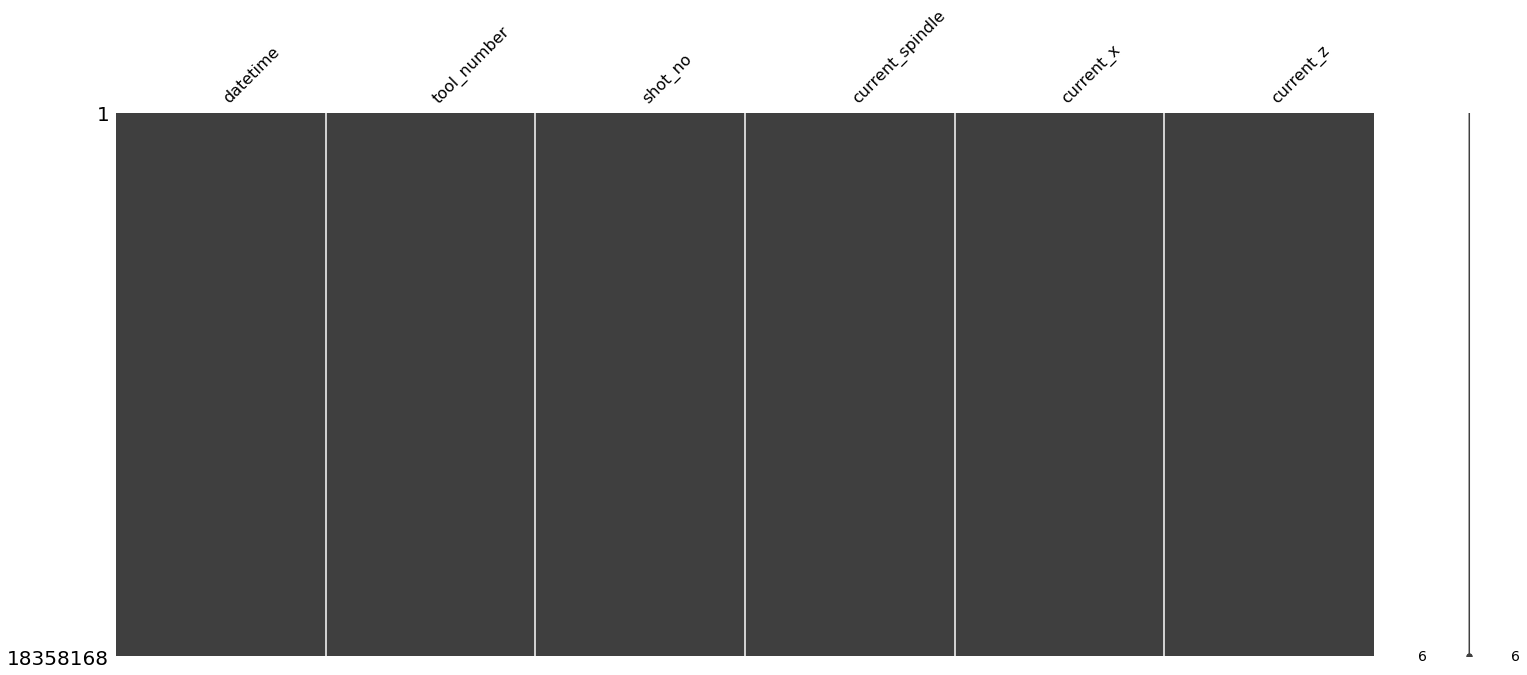

In [11]:
import missingno as msno
msno.matrix(df)

In [12]:
df.isnull().sum()

datetime           0
tool_number        0
shot_no            0
current_spindle    0
current_x          0
current_z          0
dtype: int64

In [13]:
df['shot_no'].unique()

array([6210, 6211, 6212, 6213, 6214, 6215, 6216, 6217, 6218, 6219, 6220,
       6221, 6222, 6223, 6224, 6225, 6226, 6227, 6228, 6229, 6230, 6231,
       6232, 6233, 6234, 6235, 6236, 6237, 6238, 6239, 6240, 6241, 6242,
       6243, 6244, 6245, 6246, 6247, 6248, 6249, 6250, 6251, 6252, 6253,
       6254, 6255, 6256, 6257, 6258, 6259, 6260, 6261, 6262, 6263, 6264,
       6265, 6266, 6267, 6268, 6269, 6270, 6271, 6272, 6273, 6274, 6275,
       6276, 6277, 6278, 6279, 6280, 6281, 6282, 6283, 6284, 6285, 6286,
       6287, 6288, 6289, 6290, 6291, 6292, 6293, 6294, 6295, 6296, 6297,
       6298, 6299, 6300, 6301, 6302, 6303, 6304, 6305, 6306, 6307, 6308,
       6309, 6310, 6311, 6312, 6313, 6314, 6315, 6316, 6317, 6318, 6319,
       6320, 6321, 6322, 6323, 6324, 6325, 6326, 6327, 6328, 6329, 6330,
       6331, 6332, 6333, 6334, 6335, 6336, 6337, 6338, 6339, 6340, 6341,
       6342, 6343, 6344, 6345, 6346, 6347, 6348, 6349, 6350, 6351, 6352,
       6353, 6354, 6355, 6356, 6357, 6358, 6359, 63

### tool_number로부터 tool 번호 및 상태 정보 추출

In [14]:
# tool 번호 및 상태 생성
df['tool_state'] = df['tool_number']%100
df['tool'] = (df['tool_number'] - df['tool_state'])/100
df['tool'] = df['tool'].astype(np.int32)
df
tool_number_list = list(df['tool_number'].unique())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18358168 entries, 0 to 18358167
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   datetime         object
 1   tool_number      int32 
 2   shot_no          int32 
 3   current_spindle  int32 
 4   current_x        int32 
 5   current_z        int32 
 6   tool_state       int32 
 7   tool             int32 
dtypes: int32(7), object(1)
memory usage: 630.3+ MB


### 공구 사용 패턴을 기준으로 유효한 shot을 도출
 * 'shot_no' 필드 값을 기준으로 shot 구간 찾기
 * shot 구간 내부의 공구 사용 순서 및 각 공구 별 데이터 index 구간 도출
 * 공구 사용 순서에서 유효한 공구 사용 패턴 구간 찾기
 * 유효한 공구 사용 패턴 구간에 대해 numbering하여 별도의 'real_shot' 필드에 값 설정 (디폴트 : -1) 

#### 필요한 함수 정의

In [16]:
#dataframe에 사용된 공구를 순서대로 추출해서 list형태로 반환
def extract_tool_list(data, report_result=False):
    import itertools

    tool_list = []
    #print([(k, (g)) for k, g in itertools.groupby(df_shot_specific['tool'])])
    for k, g in itertools.groupby(data['tool']):
        tool_list.append(k)

    if report_result is True:
        print(tool_list)
    
    return tool_list

In [17]:
#dataframe에 사용된 공구를 순서대로 추출해서 list형태로 반환
def extract_tool_list_with_range(data, report_result=False):
    import itertools

    irow = 1
    tool_list = []
    range_list_of_tool = []
    
    #print([(k, (g)) for k, g in itertools.groupby(df_shot_specific['tool'])])
    for k, g in itertools.groupby(data['tool']):
        tool_list.append(k)
        nrow = len(list(g))
        range_list_of_tool.append((irow,irow+nrow-1))
        irow += nrow

    if report_result is True:
        print(tool_list)
        print(range_list_of_tool)
    
    return tool_list, range_list_of_tool

In [18]:
#dataframe에서 (1) 주어진 shot_no에 해당하는 데이터를 추출한 후, (2) 해당 데이터에 사용된 공구를 순서대로 가져와서 반환
def extract_tool_list_of_specific_shot(data, shot_no, report_result=False):
    df_shot = data[data['shot_no'] == shot_no]
    
    if report_result is True:
        print("===== shot{} ============================\n\n(1) dataframe -----------------\n".format(shot_no))
        print(df_shot)
        print("(2) used tool -----------------\n")
        print(df_shot['tool'].unique())
        print("(3) extract order using tools -----------------\n")
    
    tool_list = extract_tool_list(df_shot, report_result)
    
    del df_shot
    
    return tool_list

In [19]:
#dataframe에서 전체 shot에 대해 아래의 과정 수행
#   - 각 shot 별로 사용된 공구 순서를 추출
#   - shot & 공구 사용 순서정보를 column으로 하는 dataframe을 구성한 후 반환
def extract_tool_list_of_all_shots(data, report_result=False):
    column_names = ['shot_no', 'order_using_tool']
    df_by_shot = pd.DataFrame(columns=column_names)
    row = 0

    for shot in df['shot_no'].unique():
        tool_list = extract_tool_list_of_specific_shot(df, shot, report_result)
        str_tool_list = ' '.join(map(str, tool_list))
        df_by_shot.loc[row] = [shot, str_tool_list]
        
        del tool_list
        
        row += 1

    print(df_by_shot)
    
    return df_by_shot

In [20]:
def find_sub_list(sl,l):
    results=[]
    sll=len(sl)
    for ind in (i for i,e in enumerate(l) if e==sl[0]):
        if l[ind:ind+sll]==sl:
            results.append((ind,ind+sll-1))

    return results

In [21]:
#dataframe에서 (1) 주어진 shot_no에 해당하는 데이터를 추출한 후
#(2) 해당 데이터에 사용된 공구 순서 및 각 공구 별 row index 범위를 순서대로 가져옴
#(3) 정상 패턴 가공이 이루어지는 구간을 도출 (유효한 shot으로 판단할 수 있는 구간)
#(4) (3)에서 찾은 구간 데이터의 'real_shot' 컬럼에 새로 shot numbering
def find_and_mark_valid_shot_of_specific_shot(data, shot_no, real_shot_no, report_result=False):
    df_shot = data[data['shot_no'] == shot_no]
    
    if report_result is True:
        print("===== shot{} ============================\n\n(1) dataframe -----------------\n".format(shot_no))
        print(df_shot)
        print("(2) used tool -----------------\n")
        print(df_shot['tool'].unique())
        print("(3) extract order using tools -----------------\n")
    
    tool_list, range_list_of_tool = extract_tool_list_with_range(df_shot, report_result=False)

    tool_pattern = [1, 5, 9, 11, 7, 3, 11, 7]
    sub_list = find_sub_list(tool_pattern, tool_list)
    
    if len(sub_list) < 1:
        if report_result is True:
            print("shot_no {} of raw data : invalid_shot".format(shot_no))

        return 0
    
    if report_result is True:
        print(sub_list)
    
    start_index = data[data['shot_no'] == shot_no].index[0]
    count = 0
    
    if report_result is True: 
        if sub_list[0][0] > 0:
            print("------ invalid data\n")
            print(data.iloc[start_index: start_index+range_list_of_tool[sub_list[0][0]][0]-1])
        
    for sub in sub_list:
        real_shot_no += 1
        sub_start = start_index + range_list_of_tool[sub[0]][0]
        sub_end   = start_index + range_list_of_tool[sub[1]][1]
        print("sub({}:{}) - real_shot_no {}".format(sub_start, sub_end, real_shot_no))
        data.iloc[sub_start:sub_end]['real_shot'] = real_shot_no
        
        if report_result is True:
            print("------ valid shot[{}]\n".format(count))
            print(data.iloc[sub_start:sub_end])
            
        count += 1
    
    tool_list.clear()
    range_list_of_tool.clear()
    sub_list.clear()
    
    del df_shot
    
    return count

In [22]:
#dataframe에서 유효한 공구 사용 패턴을 가지는 구간을 찾아서 별도의 컬럼('real_shot')에 새로 number 부여
# - 유효하지 않은 구간의 경우 'real_shot' 값을 -1로 설정
def find_and_mark_valid_shot(data, report_result=False):
    real_shot_no = 0
    
    data['real_shot'] = -1
    
    for shot in data['shot_no'].unique():
        real_shot_no += find_and_mark_valid_shot_of_specific_shot(data, shot, real_shot_no, report_result)
        print(real_shot_no)

#### 테스트 : shot 별 공구 사용 순서 추출 테스트

In [23]:
#테스트 : 6413번 shot에 대한 공구 사용 순서 추출
extract_tool_list_of_specific_shot(df, 6805, report_result=True)

#테스트 : 6357번 shot에 대한 공구 사용 순서 추출
extract_tool_list_of_specific_shot(df, 6357, report_result=True)

===== shot6805 ============================

(1) dataframe -----------------

                            datetime  tool_number  shot_no  current_spindle  \
11678997  2022-09-04 00:11:38.697968          707     6805                0   
11678998  2022-09-04 00:11:38.909131          707     6805                0   
11678999  2022-09-04 00:11:39.115027          707     6805                0   
11679000  2022-09-04 00:11:39.307272          707     6805                0   
11679001  2022-09-04 00:11:39.525960          707     6805                0   
...                              ...          ...      ...              ...   
11771966  2022-09-04 05:22:00.015269          101     6805                0   
11771967  2022-09-04 05:22:00.208473          101     6805                0   
11771968  2022-09-04 05:22:00.432632          101     6805                0   
11771969  2022-09-04 05:22:00.618643          101     6805                0   
11771970  2022-09-04 05:22:00.802946          101    

[1, 5, 9, 11, 7, 3, 11, 7]

#### shot no.와 해당 shot에 사용된 공구 순서 정보를 가지는 dataframe 생성

In [24]:
#전체 shot에 대한 공구 사용 순서를 추출하여 dataframe 구성
df_by_shot = extract_tool_list_of_all_shots(df)

    shot_no                       order_using_tool
0      6210                    7 1 5 9 11 7 3 11 7
1      6211                                      7
2      6212                                      7
3      6213                                      7
4      6214                                    7 1
..      ...                                    ...
690    7026                    7 1 5 9 11 7 3 11 7
691    7027  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
692    7028                    7 1 5 9 11 7 3 11 7
693    7029                    7 1 5 9 11 7 3 11 7
694    7030                  7 1 5 9 11 7 3 11 7 1

[695 rows x 2 columns]


#### shot 별 공구 사용 순서 패턴 추출

In [25]:
#공구 사용 순서 패턴 추출
df_by_shot['order_using_tool'].unique()

array(['7 1 5 9 11 7 3 11 7', '7', '7 1', '1', '1 5 9 11 7 3 11 7',
       '7 1 5 9 1 5 9 11 7 3 11 7', '7 1 5 7 11 1 5 9 11 7 3 11 7',
       '7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7', '7 1 5 9 11 7 1 3 11 7',
       '7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7',
       '7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7',
       '1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7',
       '7 1 7 1 5 9 11 7 3 11 7', '7 1 7', '7 1 5 9 -1 9 11 7 3 11 7',
       '7 1 5 9 -1 11 7 3 11 7', '7 1 5 1 5 9 11 7 3 11 7',
       '7 1 5 9 11 7 3 11 7 1'], dtype=object)

In [26]:
len(df_by_shot['order_using_tool'].unique())

18

#### 공구 사용 패턴의 정상/오류 여부 검토를 통한 유효한 shot 도출 방안 수립

##### (1) 공구 사용 패턴 : 정상

In [27]:
#(1-1) 정상 가공 패턴(1-5-9-11-7-3-11-7) 1회 수행
#---- 정상 여부 : 정상
df_by_shot[df_by_shot['order_using_tool'] == '1 5 9 11 7 3 11 7']

shot_no   order_using_tool
7      6217  1 5 9 11 7 3 11 7
26     6236  1 5 9 11 7 3 11 7
122    6332  1 5 9 11 7 3 11 7
147    6357  1 5 9 11 7 3 11 7
178    6388  1 5 9 11 7 3 11 7
226    6436  1 5 9 11 7 3 11 7
247    6457  1 5 9 11 7 3 11 7
268    6478  1 5 9 11 7 3 11 7
294    6504  1 5 9 11 7 3 11 7
395    6731  1 5 9 11 7 3 11 7
471    6807  1 5 9 11 7 3 11 7
571    6907  1 5 9 11 7 3 11 7
596    6932  1 5 9 11 7 3 11 7
617    6953  1 5 9 11 7 3 11 7
642    6978  1 5 9 11 7 3 11 7

In [28]:
#(1-2) 맨처음 Tool7 사용한 후 정상 가공 패턴(1-5-9-11-7-3-11-7) 1회 수행
#---- 정상 여부 : 정상
#---- 처리 방안 : 맨 앞의 Tool7에 해당하는 데이터 삭제 후 사용
df_by_shot[df_by_shot['order_using_tool'] == '7 1 5 9 11 7 3 11 7']

shot_no     order_using_tool
0      6210  7 1 5 9 11 7 3 11 7
8      6218  7 1 5 9 11 7 3 11 7
9      6219  7 1 5 9 11 7 3 11 7
10     6220  7 1 5 9 11 7 3 11 7
11     6221  7 1 5 9 11 7 3 11 7
..      ...                  ...
686    7022  7 1 5 9 11 7 3 11 7
689    7025  7 1 5 9 11 7 3 11 7
690    7026  7 1 5 9 11 7 3 11 7
692    7028  7 1 5 9 11 7 3 11 7
693    7029  7 1 5 9 11 7 3 11 7

[550 rows x 2 columns]

In [29]:
#(1-3) 맨 처음 Tool7 사용 후 정상 가공 패턴(1-5-9-11-7-3-11-7) 2번 반복
#---- 정상 여부 : 정상
#---- 처리 방안 : 맨 앞의 Tool7에 해당하는 데이터 삭제 후 2개의 shot으로 분리
df_by_shot[df_by_shot['order_using_tool'] == '7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7']

shot_no                       order_using_tool
19     6229  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
38     6248  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
51     6261  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
56     6266  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
75     6285  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
84     6294  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
100    6310  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
108    6318  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
163    6373  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
180    6390  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
189    6399  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
203    6413  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
228    6438  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
235    6445  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
251    6461  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
253    6463  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
272    6482  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
273    6483  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
277    6487  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
354    6564  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
355    6565  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
379    6589  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
384    6594  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
385    6595  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
402    6738  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
407    6743  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
428    6764  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
431    6767  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
436    6772  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
472    6808  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
473    6809  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
494    6830  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
499    6835  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
519    6855  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
527    6863  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
580    6916  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
599    6935  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
601    6937  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
622    6958  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
625    6961  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
629    6965  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
666    7002  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7
691    7027  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7

In [30]:
#(1-4) 맨 처음 Tool7 사용 후 정상 가공 패턴(1-5-9-11-7-3-11-7) 4번 반복
#---- 정상 여부 : 정상
#---- 처리 방안 : 맨 앞의 Tool7에 해당하는 데이터 삭제 후 4개의 shot으로 분리
df_by_shot[df_by_shot['order_using_tool'] == '7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7']

shot_no                                   order_using_tool
39    6249  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7 1 5 9 11...

In [31]:
#(1-5) 맨 처음 Tool7 사용 후 정상 가공 패턴(1-5-9-11-7-3-11-7) 3번 반복
#---- 정상 여부 : 정상
#---- 처리 방안 : 맨 앞의 Tool7에 해당하는 데이터 삭제 후 3개의 shot으로 분리
df_by_shot[df_by_shot['order_using_tool'] == '7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7']

shot_no                                   order_using_tool
129    6339  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7 1 5 9 11...
331    6541  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7 1 5 9 11...
450    6786  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7 1 5 9 11...
477    6813  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7 1 5 9 11...
650    6986  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7 1 5 9 11...
669    7005  7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7 1 5 9 11...

In [32]:
#(1-6) 정상 가공 패턴(1-5-9-11-7-3-11-7) 3번 반복
#---- 정상 여부 : 정상
#---- 처리 방안 : 3개의 shot으로 분리
#---- 검토결과 ---------------
# 생산일 : 2022-08-21 ~ 2022-08-22
# 2022-08-21 19:46 ~ 2022-08-22 08:01 Tool1 데이터임 (current_spindle=0, current_x=0, current_z=2인 상태 계속)
# ===> 위 데이터는 삭제 후 처리하는 것이 좋을 듯함 (★)
# 2022-08-22 08:01 ~ 2022-08-22 10:14 정상 가공
df_by_shot[df_by_shot['order_using_tool'] == '1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7']

shot_no                                   order_using_tool
307    6517  1 5 9 11 7 3 11 7 1 5 9 11 7 3 11 7 1 5 9 11 7...

In [33]:
#(1-7) 맨 처음 Tool7 사용 후 정상 가공 패턴(1-5-9-11-7-3-11-7) 1번 이후 Tool1 사용 ////////todo
#---- 정상 여부 : 정상
#---- 처리 방안 : 맨 앞의 Tool7, 맨 뒤의 Tool1에 해당하는 데이터 삭제 후 1개의 shot 처리
df_by_shot[df_by_shot['order_using_tool'] == '7 1 5 9 11 7 3 11 7 1']

shot_no       order_using_tool
694    7030  7 1 5 9 11 7 3 11 7 1

##### (2) 공구 사용 패턴 : 오류 → 삭제 필요

In [34]:
#(2-1) Tool7만 사용
#---- 정상 여부 : 오류
#---- 처리 방안 : 삭제
#---- 검토 결과 : 20초 가량의 데이터임
df_by_shot[df_by_shot['order_using_tool'] == '7']

shot_no order_using_tool
1      6211                7
2      6212                7
3      6213                7
50     6260                7
72     6282                7
73     6283                7
98     6308                7
134    6344                7
200    6410                7
201    6411                7
248    6458                7
269    6479                7
270    6480                7
353    6563                7
375    6585                7
399    6735                7
445    6781                7
446    6782                7
466    6802                7
467    6803                7
468    6804                7
475    6811                7
476    6812                7
493    6829                7
517    6853                7
518    6854                7
539    6875                7
548    6884                7
549    6885                7
550    6886                7
552    6888                7
553    6889                7
555    6891                7
592    6928                7
593    6929                7
594    6930                7
618    6954                7
674    7010                7
676    7012                7
684    7020                7
687    7023                7
688    7024                7

In [35]:
#(2-2) Tool1만 사용
#---- 정상 여부 : 오류
#---- 처리 방안 : 삭제
#---- 검토 결과 : 5~10초 가량의 데이터임
df_by_shot[df_by_shot['order_using_tool'] == '1']

shot_no order_using_tool
5      6215                1
6      6216                1
24     6234                1
25     6235                1
145    6355                1
146    6356                1
225    6435                1
293    6503                1
306    6516                1
470    6806                1
640    6976                1
641    6977                1

In [36]:
#(2-3) 7-1 순으로 사용
#---- 정상 여부 : 오류
#---- 처리 방안 : 삭제
#---- 검토결과 ---------------
# shot_no : 6214
# ... 생산일 : 2022-08-01
# ... 00:45:30~00:45:46 Tool7 - Tool1 사용 (tool_number=100, current_spindle=0, current_x=0, current_z=2)
# ... 00:45:46~06:48:24 Tool1 사용 (tool_number=101, 전류값 있음)
# shot_no : 6233
# ... 생산일 : 2022-08-04
# ... 14:03:05~14:31:26 Tool7 - Tool1 사용 (tool_number=100, current_spindle=0, current_x=0, current_z<=4)
# ... 14:31:26~19:34:16 Tool1 사용 (tool_number=101 or 100, 전류값 있다가 없다가 반복)
# ...............................
df_by_shot[df_by_shot['order_using_tool'] == '7 1']

shot_no order_using_tool
4      6214              7 1
23     6233              7 1
121    6331              7 1
144    6354              7 1
177    6387              7 1
224    6434              7 1
246    6456              7 1
267    6477              7 1
292    6502              7 1
305    6515              7 1
394    6604              7 1
469    6805              7 1
570    6906              7 1
595    6931              7 1
616    6952              7 1
639    6975              7 1

In [37]:
#(2-4) 7-1-7 순으로 사용
#---- 정상 여부 : 오류
#---- 처리 방안 : 삭제
#---- 검토결과 ---------------
# 생산일 : 2022-09-02
# 05:55:47~05:58:07 Tool7 사용 (tool_number=707, current_spindle=0, current_x=0, current_z=2)
# 05:58:07~05:58:09 Tool1 사용 (tool_number=100, current_spindle=0, current_x=0, current_z=2)
# 05:58:09~05:58:17 Tool7 사용 (tool_number=707, current_spindle=0, current_x=0, current_z=2)
# 00:12~05:22 Tool1 사용 (tool_number=101, current_spindle > )
df_by_shot[df_by_shot['order_using_tool'] == '7 1 7']

shot_no order_using_tool
423    6759            7 1 7

In [38]:
#(2-5) 정상 가공 패턴(1-5-9-11-7-3-11-7) 없음
#---- 정상 여부 : 오류
#---- 처리 방안 : 삭제
df_by_shot[df_by_shot['order_using_tool'] == '7 1 5 9 11 7 1 3 11 7']
#---- 검토결과 ---------------
# 생산일 : 2022-08-08
# 18:40~21:01 비가동 Tool7 - Tool1 (tool_number=100, current_spindle=0)
# 21:01~21:21 가동   Tool1 - Tool5
# 21:21~21:46 비가동 Tool5 - Tool9 (tool_number=900, current_spindle=0) 
# 21:46~21:47 가동   Tool9
# 21:47~21:56 비가동 Tool9 (tool_number=909, current_spindle=0)
# 21:56~22:01 가동   Tool9
# 22:01~22:10 비가동 Tool9 - Tool11 (tool_number=1100, current_spindle=0)
# 22:10~22:13 가동   Tool11
# 22:13~22:20 비가동 Tool11 - Tool7 (tool_number=700, current_spindle=0)
# 22:20~22:22 가동   Tool7
# 22:22~22:42 비가동 Tool7 - Tool1 (tool_number=100, current_spindle=0)
# 22:42~22:52 가동   Tool1 - Tool3 - Tool11 - Tool7
#---- 결론 -------------------
# 1-5-9-11-7-1-3-11-7 내부의 2번째 Tool1로 인해서 shot 판별이 어려운 케이스
# 해당 번호 구간의 데이터를 검토한 결과 : current_spindle <=17, current_x=0, current_z<=4 등 매우 작은 값임
# 맨 처음 Tool7 구간과 두번째 Tool1 구간 삭제 후 1개의 shot으로 판별할 수도 있을듯함

shot_no       order_using_tool
35    6245  7 1 5 9 11 7 1 3 11 7

##### (3) 공구 사용 패턴 : 오류 → 처리 방안 검토 필요

In [39]:
#(3-1) 7-1-5-9 순으로 공구 사용 한 후 정상 가공 패턴(1-5-9-11-7-3-11-7)
#---- 정상 여부 : ★검토필요★
#---- 처리 방안 : ★검토필요★
#---- 검토결과 ---------------
# 생산일 : 2022-08-03
# 14:27~14:48 가동   Tool7 - Tool1 - Tool5
# 14:49~15:35 비가동 Tool9 (tool_number=909, current_spindle=0)
# 15:35~15:47 가동   Tool1
# 15:47~15:55 비가동 Tool1 - Tool5 (tool_number=500, current_spindle=0)
# 15:54~16:01 가동   Tool5
# 16:02~16:13 비가동 Tool5 - Tool9 (tool_number=900, current_spindle=0)
# 16:13~16:37 가동   Tool9 - Tool11 - Tool7 - Tool3 - Tool11 - Tool7
# 16:37~20:00 비가동
#---- 결론 -------------------
# 시작 부위의 7-1-5-9 제외 후 1개의 shot으로 취급하면 됨
# shot 내의 비가동 구간은 current_spindle, current_x값은 모두 0이고, current_z는 2 또는 0인데 대표값 계산에는 
# 영향을 미치지 않을 정도의 값이므로 삭제하거나 하지 않아도 될 것으로 판단됨
df_by_shot[df_by_shot['order_using_tool'] == '7 1 5 9 1 5 9 11 7 3 11 7']

shot_no           order_using_tool
15    6225  7 1 5 9 1 5 9 11 7 3 11 7

In [40]:
#(3-2) 7-1-5-7-11 순으로 공구 사용 한 후 정상 가공 패턴(1-5-9-11-7-3-11-7)
#---- 정상 여부 : ★검토필요★
#---- 처리 방안 : ★검토필요★
#---- 검토결과 ---------------
# 생산일 : 2022-08-03
# 16:37~21:39 비가동 Tool7 - Tool1 (tool_number=100, current_spindle=0)
# 21:39~21:51 가동   Tool1
# 21:51~22:24 비가동 Tool1 - Tool5 (tool_number=500, current_spindle = 0)
# 22:24~22:31 가동   Tool5
# 22:31~22:50 비가동 Tool5 - Tool7 (tool_number=700, current_spindle=0)
# 22:50~22:57 가동   Tool7 - Tool11
# 22:57~23:51 비가동 Tool11 - Tool1 (tool_number=100, current_spindle=0)
# 23:51~00:34 가동   Tool1 - Tool5 - Tool9 - Tool11 - Tool7 - Tool3 - Tool11 - Tool7
#---- 결론 -------------------
# 시작 부위의 7-1-5-7-11 제외 후 1개의 shot으로 취급하면 됨
df_by_shot[df_by_shot['order_using_tool'] == '7 1 5 7 11 1 5 9 11 7 3 11 7']

shot_no              order_using_tool
16    6226  7 1 5 7 11 1 5 9 11 7 3 11 7

In [41]:
#(3-3) 7-1-7 순으로 공구 사용 한 후 정상 가공 패턴(1-5-9-11-7-3-11-7)
#---- 정상 여부 : ★검토필요★
#---- 처리 방안 : ★검토필요★
#---- 검토결과 ---------------
# 생산일 : 2022-08-25
# 비가동 상태 없음
# 07:44~07:46 Tool7 - Tool1 - Tool7 (tool_number=707, current_spindle=0)
#---- 결론 -------------------
# 시작 부위의 7-1-7 제외 후 1개의 shot으로 취급하면 됨
df_by_shot[df_by_shot['order_using_tool'] == '7 1 7 1 5 9 11 7 3 11 7']

shot_no         order_using_tool
377    6587  7 1 7 1 5 9 11 7 3 11 7

In [42]:
#(3-4) 정상 가공 패턴(1-5-9-11-7-3-11-7) 없음
#---- 정상 여부 : 오류
#---- 처리 방안 : 삭제
df_by_shot[df_by_shot['order_using_tool'] == '7 1 5 9 -1 9 11 7 3 11 7']
#---- 검토결과 ---------------
# 생산일 : 2022-09-02
# 비가동 상태 없음
# 16:01:19~16:03:37 Tool7 (current_spindle=0, current_x=0, currnet_z=2)
# 16:03:40~16:15:54 Tool1
# 16:15:54~16:23:54 Tool5
# 16:23:54~16:29:26 Tool9
# 16:29:26~16:30:56 Tool-1 (★오류)
# 16:30:57~16:31:31 Tool9
# 16:31:31~16:34:14 Tool11
# 16:34:14~16:36:27 Tool7
# 16:36:27~16:37:55 Tool3
# 16:37:55~16:43:40 Tool11
# 16:43:40~16:46:11 Tool7
#---- 결론 -------------------
# 맨 앞의 Tool7 데이터와 Tool-1 데이터(결측 데이터) 삭제 후 shot 1회로 판단하면 될듯함
# 단, 이 경우는 Tool9 데이터가 2개로 나뉘어 있으므로 공구 데이터의 시간 연속성은 깨짐. 시간 정보를 index처럼 활용해야 할 것으로 보임

shot_no          order_using_tool
433    6769  7 1 5 9 -1 9 11 7 3 11 7

In [43]:
#(3-5) 정상 가공 패턴(1-5-9-11-7-3-11-7) 없음
#---- 정상 여부 : 오류
#---- 처리 방안 : 삭제
df_by_shot[df_by_shot['order_using_tool'] == '7 1 5 9 -1 11 7 3 11 7']
#---- 검토결과 ---------------
# 생산일 : 2022-09-03
# 비가동 상태 없음
# 00:57:53~00:59:29 Tool7 (current_spindle=0, current_x=0, currnet_z=2)
# 00:59:29~01:11:33 Tool1
# 01:11:33~01:19:22 Tool5
# 01:19:22~01:26:17 Tool9
# 01:26:23~01:27:50 Tool-1 (★오류)
# 01:27:51~01:29:20 Tool11
# 01:29:20~01:31:25 Tool7
# 01:31:25~01:32:44 Tool3
# 01:32:44~01:38:22 Tool11
# 01:38:23~01:40:47 Tool7
#---- 결론 -------------------
# 맨 앞의 Tool7 데이터와 Tool-1 데이터(결측 데이터) 삭제 후 shot 1회로 판단하면 될듯함

shot_no        order_using_tool
443    6779  7 1 5 9 -1 11 7 3 11 7

##### (4) 공구 사용 패턴 분석 결과 => 유효한 shot 탐색 방안 수립

######  (4-1) 데이터 탐색 결과 
 * 이전 가공의 끝에 사용된 Tool7이 장착된 상태에서 shot_no가 변경되는 경향 있음
    ==> 이 경우 처음 몇 개의 데이터는 전류 센서 값이 유효하나 이후로 current_spindle=0, current_x=0, current_z=2로 유지됨
 * 다음 가공이 시작되었는데 shot_no는 유지된 경우 있음 (1개의 케이스)
 * tool_number가 -1인 데이터가 발생되는 케이스 있음 (2개) => 결측치로 처리 필요
 * 이외의 구간에서는 정상 가공 패턴(1-5-9-11-7-3-11-7)이 반복됨
 * 정상 가공 패턴(1-5-9-11-7-3-11-7)에서 앞부분 데이터에 current_spindle=0, current_x=0, current_z=2와 같이 무효한 값들이 오랜 시간 지속되는 케이스 있음
    ==> 해당 데이터 삭제 후 처리하는 것이 좋을 듯함

###### (4-2) 유효한 shot 탐색 방안
 * 아래와 같은 순으로 처리하면 유효한 shot을 찾을 수 있음
 * ① shot_no 기준으로 데이터 그룹화
 * ② 결측치 (tool_number=-1인 데이터) 삭제
 * ③ 정상 가공 패턴(1-5-9-11-7-3-11-7) 구간 찾기
 * ④-1) 정상 가공 패턴 구간이 없는 shot은 무효한 shot으로 판별하여 삭제
 * ④-2) 정상 가공 패턴 구간이 있는 shot은 해당 사이클 별로 sub 그룹화
 * ⑤ ④-2)에서 찾은 sub 그룹들에 대해 별도의 shot 번호 관리 (추후, 공구 교체 시점을 반영하면, 그 이후 시점부터의 count를 관리하면 됨)
 * ⑥ 유효한 shot 데이터 중 시작 부위에 current_spindle이 0인 데이터들 삭제 필요(유효하지 않은 데이터로 판단됨)

#### 정상 가공 패턴(1-5-9-11-7-3-11-7)을 기준으로 유효한 shot 도출

In [44]:
#'tool_number' 필드 값이 -1인 결측 데이터 구간 drop
df = df.drop(df[df['tool_number'] == -1].index)

In [45]:
#유효한 shot 구간을 찾아서 'real_shot' 필드에 shot no. counting
find_and_mark_valid_shot(df, report_result=True)

===== shot6210 ============================

(1) dataframe -----------------

                         datetime  tool_number  shot_no  current_spindle  \
0      2022-08-01 00:00:00.357458          707     6210                0   
1      2022-08-01 00:00:00.523228          707     6210                0   
2      2022-08-01 00:00:00.751894          707     6210                0   
3      2022-08-01 00:00:00.920389          707     6210                0   
4      2022-08-01 00:00:01.121784          707     6210                0   
...                           ...          ...      ...              ...   
13358  2022-08-01 00:44:42.705768          707     6210             3660   
13359  2022-08-01 00:44:42.917168          707     6210             3660   
13360  2022-08-01 00:44:43.100070          707     6210             6295   
13361  2022-08-01 00:44:43.293087          707     6210             6295   
13362  2022-08-01 00:44:43.497762          707     6210             6295   

       cu

[(0, 7)]
sub(122381:620662) - real_shot_no 2
------ valid shot[0]

                          datetime  tool_number  shot_no  current_spindle  \
122381  2022-08-01 06:49:04.495090          101     6217                0   
122382  2022-08-01 06:49:04.720321          101     6217                0   
122383  2022-08-01 06:49:04.892796          101     6217                0   
122384  2022-08-01 06:49:05.094532          101     6217                0   
122385  2022-08-01 06:49:05.308977          101     6217                0   
...                            ...          ...      ...              ...   
620657  2022-08-03 08:53:37.119829          707     6217             2178   
620658  2022-08-03 08:53:37.291830          707     6217             2178   
620659  2022-08-03 08:53:37.502889          707     6217             6973   
620660  2022-08-03 08:53:37.696617          707     6217             6973   
620661  2022-08-03 08:53:37.892743          707     6217             6973   

        

                          datetime  tool_number  shot_no  current_spindle  \
661083  2022-08-03 11:08:45.099488          100     6221                0   
661084  2022-08-03 11:08:45.344664          100     6221                0   
661085  2022-08-03 11:08:45.499836          100     6221                0   
661086  2022-08-03 11:08:45.728009          100     6221                0   
661087  2022-08-03 11:08:45.900642          100     6221                0   
...                            ...          ...      ...              ...   
672767  2022-08-03 11:47:46.685737          707     6221             6713   
672768  2022-08-03 11:47:46.908724          707     6221             6713   
672769  2022-08-03 11:47:47.097868          707     6221             6713   
672770  2022-08-03 11:47:47.286918          707     6221             4857   
672771  2022-08-03 11:47:47.485496          707     6221             4857   

        current_x  current_z  tool_state  tool  real_shot  
661083         

                          datetime  tool_number  shot_no  current_spindle  \
759336  2022-08-03 16:37:10.789025          707     6226             1767   
759337  2022-08-03 16:37:11.032287          707     6226             1767   
759338  2022-08-03 16:37:11.190195          707     6226               95   
759339  2022-08-03 16:37:11.408998          707     6226               95   
759340  2022-08-03 16:37:11.626984          707     6226               95   
...                            ...          ...      ...              ...   
889368  2022-08-03 23:51:31.328730         1111     6226                0   
889369  2022-08-03 23:51:31.522953         1111     6226                0   
889370  2022-08-03 23:51:31.751167         1111     6226                0   
889371  2022-08-03 23:51:31.921928         1111     6226                0   
889372  2022-08-03 23:51:32.146462         1111     6226                0   

        current_x  current_z  tool_state  tool  real_shot  
759336         

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
1102660  2022-08-04 11:45:20.078298          707     6231             1734   
1102661  2022-08-04 11:45:20.249760          707     6231             1734   
1102662  2022-08-04 11:45:20.472428          707     6231             1734   
1102663  2022-08-04 11:45:20.658589          707     6231               31   
1102664  2022-08-04 11:45:20.861113          707     6231               31   
...                             ...          ...      ...              ...   
1103301  2022-08-04 11:47:28.436041          707     6231                0   
1103302  2022-08-04 11:47:28.668925          707     6231                0   
1103303  2022-08-04 11:47:28.846500          707     6231                0   
1103304  2022-08-04 11:47:29.051815          707     6231                0   
1103305  2022-08-04 11:47:29.257894        

------ valid shot[0]

                           datetime  tool_number  shot_no  current_spindle  \
1389808  2022-08-05 03:43:50.073089          100     6237                0   
1389809  2022-08-05 03:43:50.274342          100     6237                0   
1389810  2022-08-05 03:43:50.468733          100     6237                0   
1389811  2022-08-05 03:43:50.656464          100     6237                0   
1389812  2022-08-05 03:43:50.874459          100     6237                0   
...                             ...          ...      ...              ...   
1402555  2022-08-05 04:26:23.004452          707     6237             2055   
1402556  2022-08-05 04:26:23.192058          707     6237             7816   
1402557  2022-08-05 04:26:23.392990          707     6237             7816   
1402558  2022-08-05 04:26:23.589715          707     6237             7816   
1402559  2022-08-05 04:26:23.810268          707     6237             2007   

         current_x  current_z  tool_state

------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
1793573  2022-08-06 02:11:37.629382          707     6240             1923   
1793574  2022-08-06 02:11:37.835203          707     6240             1923   
1793575  2022-08-06 02:11:38.018288          707     6240             1923   
1793576  2022-08-06 02:11:38.214161          707     6240               38   
1793577  2022-08-06 02:11:38.415266          707     6240               38   
...                             ...          ...      ...              ...   
1958504  2022-08-06 11:22:09.610957          707     6240                0   
1958505  2022-08-06 11:22:09.814401          707     6240                0   
1958506  2022-08-06 11:22:10.010996          707     6240                0   
1958507  2022-08-06 11:22:10.239669          707     6240                0   
1958508  2022-08-06 11:22:10.414146          707     6240                0   

         current_x  current_z  tool_state 

[(1, 8)]
------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
2778400  2022-08-08 08:59:01.095482          707     6242             1765   
2778401  2022-08-08 08:59:01.279631          707     6242             1765   
2778402  2022-08-08 08:59:01.480805          707     6242             1765   
2778403  2022-08-08 08:59:01.684366          707     6242             1765   
2778404  2022-08-08 08:59:01.881116          707     6242               29   
...                             ...          ...      ...              ...   
2858571  2022-08-08 13:26:37.726649          707     6242                0   
2858572  2022-08-08 13:26:37.892374          707     6242                0   
2858573  2022-08-08 13:26:38.098410          707     6242                0   
2858574  2022-08-08 13:26:38.304234          707     6242                0   
2858575  2022-08-08 13:26:38.513239          707     6242                0   

         current_x  current_z  to

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
3213461  2022-08-09 09:11:15.313442          707     6247             4290   
3213462  2022-08-09 09:11:15.507715          707     6247              469   
3213463  2022-08-09 09:11:15.696669          707     6247              469   
3213464  2022-08-09 09:11:15.908177          707     6247               20   
3213465  2022-08-09 09:11:16.113962          707     6247               20   
...                             ...          ...      ...              ...   
3282564  2022-08-09 13:01:55.044546          707     6247                0   
3282565  2022-08-09 13:01:55.238793          707     6247                0   
3282566  2022-08-09 13:01:55.428758          707     6247                0   
3282567  2022-08-09 13:01:55.649256          707     6247                0   
3282568  2022-08-09 13:01:55.838933        

                           datetime  tool_number  shot_no  current_spindle  \
3436630  2022-08-09 21:36:11.074259          707     6251             1844   
3436631  2022-08-09 21:36:11.295734          707     6251             1844   
3436632  2022-08-09 21:36:11.484265          707     6251               91   
3436633  2022-08-09 21:36:11.680084          707     6251               91   
3436634  2022-08-09 21:36:11.880516          707     6251               91   
...                             ...          ...      ...              ...   
3437318  2022-08-09 21:38:28.866977          707     6251                0   
3437319  2022-08-09 21:38:29.067037          707     6251                0   
3437320  2022-08-09 21:38:29.253609          707     6251                0   
3437321  2022-08-09 21:38:29.450840          707     6251                0   
3437322  2022-08-09 21:38:29.651086          707     6251                0   

         current_x  current_z  tool_state  tool  real_shot  
34

[12752 rows x 9 columns]
42
===== shot6257 ============================

(1) dataframe -----------------

                           datetime  tool_number  shot_no  current_spindle  \
3516811  2022-08-10 02:03:49.494997          707     6257             2130   
3516812  2022-08-10 02:03:49.716978          707     6257             2130   
3516813  2022-08-10 02:03:49.899818          707     6257               67   
3516814  2022-08-10 02:03:50.096311          707     6257               67   
3516815  2022-08-10 02:03:50.334163          707     6257               67   
...                             ...          ...      ...              ...   
3530076  2022-08-10 02:48:06.438108          707     6257             2017   
3530077  2022-08-10 02:48:06.647529          707     6257             7848   
3530078  2022-08-10 02:48:06.853228          707     6257             7848   
3530079  2022-08-10 02:48:07.059387          707     6257             7848   
3530080  2022-08-10 02:48:07.238497 

[431 rows x 9 columns]
sub(3651061:3663850) - real_shot_no 48
------ valid shot[0]

                           datetime  tool_number  shot_no  current_spindle  \
3651061  2022-08-10 09:31:56.620241          100     6262                0   
3651062  2022-08-10 09:31:56.825591          100     6262                0   
3651063  2022-08-10 09:31:57.016838          100     6262                0   
3651064  2022-08-10 09:31:57.217251          100     6262                0   
3651065  2022-08-10 09:31:57.417308          100     6262                0   
...                             ...          ...      ...              ...   
3663845  2022-08-10 10:14:36.977553          707     6262             7553   
3663846  2022-08-10 10:14:37.175916          707     6262             7553   
3663847  2022-08-10 10:14:37.373549          707     6262             5968   
3663848  2022-08-10 10:14:37.592965          707     6262             5968   
3663849  2022-08-10 10:14:37.792622          707     6262 


                           datetime  tool_number  shot_no  current_spindle  \
3753283  2022-08-10 15:13:09.394591          707     6268             4785   
3753284  2022-08-10 15:13:09.588897          707     6268             4785   
3753285  2022-08-10 15:13:09.777836          707     6268             4785   
3753286  2022-08-10 15:13:09.964981          707     6268              197   
3753287  2022-08-10 15:13:10.171848          707     6268              197   
...                             ...          ...      ...              ...   
3766539  2022-08-10 15:57:24.250770          707     6268             3663   
3766540  2022-08-10 15:57:24.450336          707     6268             3663   
3766541  2022-08-10 15:57:24.638903          707     6268             3663   
3766542  2022-08-10 15:57:24.827879          707     6268             6413   
3766543  2022-08-10 15:57:25.044660          707     6268             6413   

         current_x  current_z  tool_state  tool  real_shot  
3

------ valid shot[0]

                           datetime  tool_number  shot_no  current_spindle  \
3823733  2022-08-10 19:08:18.677077          100     6273                0   
3823734  2022-08-10 19:08:18.882848          100     6273                0   
3823735  2022-08-10 19:08:19.084050          100     6273                0   
3823736  2022-08-10 19:08:19.266883          100     6273                0   
3823737  2022-08-10 19:08:19.473163          100     6273                0   
...                             ...          ...      ...              ...   
3853465  2022-08-10 20:47:33.370694          707     6273             2059   
3853466  2022-08-10 20:47:33.571389          707     6273             7756   
3853467  2022-08-10 20:47:33.773801          707     6273             7756   
3853468  2022-08-10 20:47:33.959300          707     6273             4614   
3853469  2022-08-10 20:47:34.173053          707     6273             4614   

         current_x  current_z  tool_state

                           datetime  tool_number  shot_no  current_spindle  \
3921422  2022-08-11 00:34:23.916449          707     6279             6271   
3921423  2022-08-11 00:34:24.105417          707     6279             1380   
3921424  2022-08-11 00:34:24.281703          707     6279             1380   
3921425  2022-08-11 00:34:24.505503          707     6279             1380   
3921426  2022-08-11 00:34:24.705519          707     6279               30   
...                             ...          ...      ...              ...   
3922067  2022-08-11 00:36:33.047963          707     6279                0   
3922068  2022-08-11 00:36:33.248239          707     6279                0   
3922069  2022-08-11 00:36:33.456035          707     6279                0   
3922070  2022-08-11 00:36:33.654849          707     6279                0   
3922071  2022-08-11 00:36:33.879148          707     6279                0   

         current_x  current_z  tool_state  tool  real_shot  
39


                           datetime  tool_number  shot_no  current_spindle  \
4043070  2022-08-11 07:20:30.260850          707     6285              967   
4043071  2022-08-11 07:20:30.471596          707     6285              967   
4043072  2022-08-11 07:20:30.672075          707     6285               42   
4043073  2022-08-11 07:20:30.877619          707     6285               42   
4043074  2022-08-11 07:20:31.100072          707     6285               42   
4043075  2022-08-11 07:20:31.260988          707     6285               42   
4043076  2022-08-11 07:20:31.465802          707     6285                0   
4043077  2022-08-11 07:20:31.683488          707     6285                0   
4043078  2022-08-11 07:20:31.862567          707     6285                0   
4043079  2022-08-11 07:20:32.062919          707     6285                0   
4043080  2022-08-11 07:20:32.264260          707     6285                0   
4043081  2022-08-11 07:20:32.477434          707     6285      

------ valid shot[0]

                           datetime  tool_number  shot_no  current_spindle  \
4158338  2022-08-11 13:45:15.969139          100     6291                0   
4158339  2022-08-11 13:45:16.166028          100     6291                0   
4158340  2022-08-11 13:45:16.335198          100     6291                0   
4158341  2022-08-11 13:45:16.532567          100     6291                0   
4158342  2022-08-11 13:45:16.737549          100     6291                0   
...                             ...          ...      ...              ...   
4171090  2022-08-11 14:27:49.854412          707     6291             7322   
4171091  2022-08-11 14:27:50.088699          707     6291             7322   
4171092  2022-08-11 14:27:50.248785          707     6291             7322   
4171093  2022-08-11 14:27:50.460142          707     6291             5901   
4171094  2022-08-11 14:27:50.671159          707     6291             5901   

         current_x  current_z  tool_state

------ valid shot[0]

                           datetime  tool_number  shot_no  current_spindle  \
4254288  2022-08-11 19:05:32.471695          100     6297                0   
4254289  2022-08-11 19:05:32.683719          100     6297                0   
4254290  2022-08-11 19:05:32.900388          100     6297                0   
4254291  2022-08-11 19:05:33.058912          100     6297                0   
4254292  2022-08-11 19:05:33.259646          100     6297                0   
...                             ...          ...      ...              ...   
4281680  2022-08-11 20:36:58.514223          707     6297             4678   
4281681  2022-08-11 20:36:58.719978          707     6297             4678   
4281682  2022-08-11 20:36:58.941077          707     6297             7182   
4281683  2022-08-11 20:36:59.102352          707     6297             7182   
4281684  2022-08-11 20:36:59.297061          707     6297             7182   

         current_x  current_z  tool_state


                           datetime  tool_number  shot_no  current_spindle  \
4342092  2022-08-11 23:58:37.578876          707     6303             2571   
4342093  2022-08-11 23:58:37.778742          707     6303             2571   
4342094  2022-08-11 23:58:37.989654          707     6303              194   
4342095  2022-08-11 23:58:38.224488          707     6303              194   
4342096  2022-08-11 23:58:38.401740          707     6303                4   
...                             ...          ...      ...              ...   
4343028  2022-08-12 00:01:45.033486          707     6303                0   
4343029  2022-08-12 00:01:45.234214          707     6303                0   
4343030  2022-08-12 00:01:45.438320          707     6303                0   
4343031  2022-08-12 00:01:45.635650          707     6303                0   
4343032  2022-08-12 00:01:45.837931          707     6303                0   

         current_x  current_z  tool_state  tool  real_shot  
4


                           datetime  tool_number  shot_no  current_spindle  \
4472276  2022-08-12 07:13:10.419331          707     6309                0   
4472277  2022-08-12 07:13:10.608387          707     6309                0   
4472278  2022-08-12 07:13:10.813713          707     6309                0   
4472279  2022-08-12 07:13:11.014097          707     6309                0   
4472280  2022-08-12 07:13:11.189542          707     6309                0   
4472281  2022-08-12 07:13:11.389648          707     6309                0   
4472282  2022-08-12 07:13:11.614248          707     6309                0   
4472283  2022-08-12 07:13:11.802658          707     6309                0   
4472284  2022-08-12 07:13:11.994312          707     6309                0   
4472285  2022-08-12 07:13:12.202611          707     6309                0   
4472286  2022-08-12 07:13:12.419888          707     6309                0   
4472287  2022-08-12 07:13:12.608463          707     6309      


                           datetime  tool_number  shot_no  current_spindle  \
4566340  2022-08-12 12:27:09.305389          707     6314             3224   
4566341  2022-08-12 12:27:09.505820          707     6314             3224   
4566342  2022-08-12 12:27:09.755977          707     6314              260   
4566343  2022-08-12 12:27:09.939270          707     6314              260   
4566344  2022-08-12 12:27:10.104633          707     6314              260   
...                             ...          ...      ...              ...   
4576887  2022-08-12 13:02:21.602545          707     6314                0   
4576888  2022-08-12 13:02:21.791151          707     6314                0   
4576889  2022-08-12 13:02:21.973860          707     6314                0   
4576890  2022-08-12 13:02:22.165669          707     6314                0   
4576891  2022-08-12 13:02:22.377694          707     6314                0   

         current_x  current_z  tool_state  tool  real_shot  
4

------ valid shot[0]

                           datetime  tool_number  shot_no  current_spindle  \
4658003  2022-08-12 17:33:07.363368          100     6319                0   
4658004  2022-08-12 17:33:07.522755          100     6319                0   
4658005  2022-08-12 17:33:07.728682          100     6319                0   
4658006  2022-08-12 17:33:07.957672          100     6319                0   
4658007  2022-08-12 17:33:08.146079          100     6319                0   
...                             ...          ...      ...              ...   
4670750  2022-08-12 18:15:40.241554          707     6319             7197   
4670751  2022-08-12 18:15:40.447392          707     6319             7197   
4670752  2022-08-12 18:15:40.647674          707     6319             5866   
4670753  2022-08-12 18:15:40.830778          707     6319             5866   
4670754  2022-08-12 18:15:41.033074          707     6319             5866   

         current_x  current_z  tool_state

[12483 rows x 9 columns]
(2) used tool -----------------

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
4752956  2022-08-12 22:50:04.406632          707     6325             1622   
4752957  2022-08-12 22:50:04.617774          707     6325             1622   
4752958  2022-08-12 22:50:04.790915          707     6325             1622   
4752959  2022-08-12 22:50:04.991528          707     6325               34   
4752960  2022-08-12 22:50:05.191727          707     6325               34   
...                             ...          ...      ...              ...   
4753741  2022-08-12 22:52:41.614549          707     6325                0   
4753742  2022-08-12 22:52:41.813716          707     6325                0   
4753743  2022-08-12 22:52:42.042614          707     6325                0   
4753744  2022-08-12 22:52:42.236895          707     6325      

------ valid shot[0]

                           datetime  tool_number  shot_no  current_spindle  \
4817683  2022-08-13 02:26:08.617157          100     6330                0   
4817684  2022-08-13 02:26:08.822546          100     6330                0   
4817685  2022-08-13 02:26:09.025818          100     6330                0   
4817686  2022-08-13 02:26:09.206654          100     6330                0   
4817687  2022-08-13 02:26:09.446127          100     6330                0   
...                             ...          ...      ...              ...   
4877713  2022-08-13 05:46:31.506657          707     6330             7732   
4877714  2022-08-13 05:46:31.701934          707     6330             7732   
4877715  2022-08-13 05:46:31.935272          707     6330             5514   
4877716  2022-08-13 05:46:32.116161          707     6330             5514   
4877717  2022-08-13 05:46:32.323888          707     6330             5514   

         current_x  current_z  tool_state

[3040 rows x 9 columns]
sub(4950344:4963098) - real_shot_no 122
------ valid shot[0]

                           datetime  tool_number  shot_no  current_spindle  \
4950344  2022-08-13 09:48:57.908173          100     6335                0   
4950345  2022-08-13 09:48:58.139769          100     6335                0   
4950346  2022-08-13 09:48:58.313318          100     6335                0   
4950347  2022-08-13 09:48:58.507675          100     6335                0   
4950348  2022-08-13 09:48:58.713836          100     6335                0   
...                             ...          ...      ...              ...   
4963093  2022-08-13 10:31:31.286584          707     6335             7576   
4963094  2022-08-13 10:31:31.480895          707     6335             5616   
4963095  2022-08-13 10:31:31.657335          707     6335             5616   
4963096  2022-08-13 10:31:31.909834          707     6335             5616   
4963097  2022-08-13 10:31:32.057351          707     633

------ valid shot[0]

                           datetime  tool_number  shot_no  current_spindle  \
5065100  2022-08-13 16:13:32.579936          100     6340                0   
5065101  2022-08-13 16:13:32.788373          100     6340                0   
5065102  2022-08-13 16:13:33.005506          100     6340                0   
5065103  2022-08-13 16:13:33.179412          100     6340                0   
5065104  2022-08-13 16:13:33.380329          100     6340                0   
...                             ...          ...      ...              ...   
5077848  2022-08-13 16:56:05.810523          707     6340             4617   
5077849  2022-08-13 16:56:05.999071          707     6340             4617   
5077850  2022-08-13 16:56:06.182420          707     6340             4617   
5077851  2022-08-13 16:56:06.410595          707     6340             5731   
5077852  2022-08-13 16:56:06.568055          707     6340             5731   

         current_x  current_z  tool_state

[1701 rows x 9 columns]
sub(5147725:5160476) - real_shot_no 134
------ valid shot[0]

                           datetime  tool_number  shot_no  current_spindle  \
5147725  2022-08-13 20:49:20.666326          100     6346                0   
5147726  2022-08-13 20:49:20.901148          100     6346                0   
5147727  2022-08-13 20:49:21.101114          100     6346                0   
5147728  2022-08-13 20:49:21.286221          100     6346                0   
5147729  2022-08-13 20:49:21.475334          100     6346                0   
...                             ...          ...      ...              ...   
5160471  2022-08-13 21:31:53.343849          707     6346             7502   
5160472  2022-08-13 21:31:53.538105          707     6346             7502   
5160473  2022-08-13 21:31:53.766677          707     6346             7502   
5160474  2022-08-13 21:31:53.933722          707     6346             7502   
5160475  2022-08-13 21:31:54.138100          707     634


                           datetime  tool_number  shot_no  current_spindle  \
5233609  2022-08-14 01:36:01.234376          707     6352             2960   
5233610  2022-08-14 01:36:01.400335          707     6352              184   
5233611  2022-08-14 01:36:01.628795          707     6352              184   
5233612  2022-08-14 01:36:01.811544          707     6352              184   
5233613  2022-08-14 01:36:02.017318          707     6352              184   
...                             ...          ...      ...              ...   
5246991  2022-08-14 02:20:41.243902          707     6352             3418   
5246992  2022-08-14 02:20:41.438205          707     6352             3418   
5246993  2022-08-14 02:20:41.624180          707     6352             3418   
5246994  2022-08-14 02:20:41.823440          707     6352             6382   
5246995  2022-08-14 02:20:42.081802          707     6352             6382   

         current_x  current_z  tool_state  tool  real_shot  
5

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
5371536  2022-08-14 09:16:25.347158          707     6359             1168   
5371537  2022-08-14 09:16:25.547103          707     6359             1168   
5371538  2022-08-14 09:16:25.764927          707     6359             1168   
5371539  2022-08-14 09:16:25.929958          707     6359               21   
5371540  2022-08-14 09:16:26.153199          707     6359               21   
...                             ...          ...      ...              ...   
5372506  2022-08-14 09:19:39.558468          707     6359                0   
5372507  2022-08-14 09:19:39.758784          707     6359                0   
5372508  2022-08-14 09:19:39.959260          707     6359                0   
5372509  2022-08-14 09:19:40.158906          707     6359                0   
5372510  2022-08-14 09:19:40.358761        

[10360 rows x 9 columns]
149
===== shot6365 ============================

(1) dataframe -----------------

                           datetime  tool_number  shot_no  current_spindle  \
5464106  2022-08-14 14:25:25.051033          707     6365              788   
5464107  2022-08-14 14:25:25.249324          707     6365              788   
5464108  2022-08-14 14:25:25.479405          707     6365              788   
5464109  2022-08-14 14:25:25.656940          707     6365               13   
5464110  2022-08-14 14:25:25.874930          707     6365               13   
...                             ...          ...      ...              ...   
5511295  2022-08-14 17:02:55.835693          707     6365             7816   
5511296  2022-08-14 17:02:56.047434          707     6365             7816   
5511297  2022-08-14 17:02:56.234691          707     6365             3886   
5511298  2022-08-14 17:02:56.441692          707     6365             3886   
5511299  2022-08-14 17:02:56.647660


                           datetime  tool_number  shot_no  current_spindle  \
5827505  2022-08-15 10:38:25.957479          707     6368             6832   
5827506  2022-08-15 10:38:26.175678          707     6368              898   
5827507  2022-08-15 10:38:26.398210          707     6368              898   
5827508  2022-08-15 10:38:26.557219          707     6368              898   
5827509  2022-08-15 10:38:26.757417          707     6368               18   
...                             ...          ...      ...              ...   
5828085  2022-08-15 10:40:22.118170          707     6368                0   
5828086  2022-08-15 10:40:22.335061          707     6368                0   
5828087  2022-08-15 10:40:22.535541          707     6368                0   
5828088  2022-08-15 10:40:22.707130          707     6368                0   
5828089  2022-08-15 10:40:22.907748          707     6368                0   

         current_x  current_z  tool_state  tool  real_shot  
5

[(1, 8), (9, 16)]
------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
5911590  2022-08-15 15:19:06.834475          707     6373             6642   
5911591  2022-08-15 15:19:07.059253          707     6373              916   
5911592  2022-08-15 15:19:07.257430          707     6373              916   
5911593  2022-08-15 15:19:07.411092          707     6373              916   
5911594  2022-08-15 15:19:07.636909          707     6373               17   
...                             ...          ...      ...              ...   
5912278  2022-08-15 15:21:24.592897          707     6373                0   
5912279  2022-08-15 15:21:24.793289          707     6373                0   
5912280  2022-08-15 15:21:25.004367          707     6373                0   
5912281  2022-08-15 15:21:25.215370          707     6373                0   
5912282  2022-08-15 15:21:25.392859          707     6373                0   

         current_x  curr

------ valid shot[0]

                           datetime  tool_number  shot_no  current_spindle  \
6024887  2022-08-15 21:37:17.529600          100     6378                0   
6024888  2022-08-15 21:37:17.741677          100     6378                0   
6024889  2022-08-15 21:37:17.927831          100     6378                0   
6024890  2022-08-15 21:37:18.128871          100     6378                0   
6024891  2022-08-15 21:37:18.329312          100     6378                0   
...                             ...          ...      ...              ...   
6037636  2022-08-15 22:19:50.837737          707     6378             7116   
6037637  2022-08-15 22:19:51.073576          707     6378             7116   
6037638  2022-08-15 22:19:51.251983          707     6378             7116   
6037639  2022-08-15 22:19:51.438828          707     6378             7116   
6037640  2022-08-15 22:19:51.663545          707     6378             4822   

         current_x  current_z  tool_state

[12756 rows x 9 columns]
170
===== shot6385 ============================

(1) dataframe -----------------

                           datetime  tool_number  shot_no  current_spindle  \
6121974  2022-08-16 03:01:21.767653          707     6385             1062   
6121975  2022-08-16 03:01:22.004381          707     6385             1062   
6121976  2022-08-16 03:01:22.181480          707     6385             1062   
6121977  2022-08-16 03:01:22.392847          707     6385               22   
6121978  2022-08-16 03:01:22.568273          707     6385               22   
...                             ...          ...      ...              ...   
6136183  2022-08-16 03:48:47.501234          707     6385             7777   
6136184  2022-08-16 03:48:47.689815          707     6385             7777   
6136185  2022-08-16 03:48:47.889848          707     6385             4967   
6136186  2022-08-16 03:48:48.084082          707     6385             4967   
6136187  2022-08-16 03:48:48.280682

------ valid shot[0]

                           datetime  tool_number  shot_no  current_spindle  \
6241158  2022-08-16 09:39:11.736798          100     6390                0   
6241159  2022-08-16 09:39:11.931070          100     6390                0   
6241160  2022-08-16 09:39:12.136830          100     6390                0   
6241161  2022-08-16 09:39:12.317535          100     6390                0   
6241162  2022-08-16 09:39:12.542643          100     6390                0   
...                             ...          ...      ...              ...   
6254417  2022-08-16 10:23:27.133331          707     6390                0   
6254418  2022-08-16 10:23:27.300949          707     6390                0   
6254419  2022-08-16 10:23:27.501137          707     6390                0   
6254420  2022-08-16 10:23:27.719077          707     6390                0   
6254421  2022-08-16 10:23:27.919302          707     6390                0   

         current_x  current_z  tool_state

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
6342501  2022-08-16 15:17:28.467733          707     6396             1618   
6342502  2022-08-16 15:17:28.659733          707     6396             1618   
6342503  2022-08-16 15:17:28.837815          707     6396             1618   
6342504  2022-08-16 15:17:29.037215          707     6396             1618   
6342505  2022-08-16 15:17:29.248644          707     6396               30   
...                             ...          ...      ...              ...   
6343319  2022-08-16 15:20:12.305202          707     6396                0   
6343320  2022-08-16 15:20:12.482663          707     6396                0   
6343321  2022-08-16 15:20:12.677044          707     6396                0   
6343322  2022-08-16 15:20:12.872048          707     6396                0   
6343323  2022-08-16 15:20:13.094332        

[12791 rows x 9 columns]
(2) used tool -----------------

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
6439365  2022-08-16 20:40:48.128436          707     6401             2855   
6439366  2022-08-16 20:40:48.328588          707     6401              178   
6439367  2022-08-16 20:40:48.546300          707     6401              178   
6439368  2022-08-16 20:40:48.764856          707     6401              178   
6439369  2022-08-16 20:40:48.928778          707     6401                6   
...                             ...          ...      ...              ...   
6439775  2022-08-16 20:42:10.280248          707     6401                0   
6439776  2022-08-16 20:42:10.444622          707     6401                0   
6439777  2022-08-16 20:42:10.679235          707     6401                0   
6439778  2022-08-16 20:42:10.844095          707     6401      

[14762 rows x 9 columns]
(2) used tool -----------------

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
6518242  2022-08-17 01:04:05.993520          707     6407             3255   
6518243  2022-08-17 01:04:06.170886          707     6407             3255   
6518244  2022-08-17 01:04:06.364730          707     6407              237   
6518245  2022-08-17 01:04:06.564796          707     6407              237   
6518246  2022-08-17 01:04:06.761066          707     6407              237   
...                             ...          ...      ...              ...   
6520628  2022-08-17 01:12:03.815119          707     6407                0   
6520629  2022-08-17 01:12:04.018252          707     6407                0   
6520630  2022-08-17 01:12:04.251964          707     6407                0   
6520631  2022-08-17 01:12:04.451726          707     6407      

[26829 rows x 9 columns]
(2) used tool -----------------

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8), (9, 16)]
------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
6657850  2022-08-17 08:50:06.076249          707     6413             4460   
6657851  2022-08-17 08:50:06.329901          707     6413              140   
6657852  2022-08-17 08:50:06.490129          707     6413              140   
6657853  2022-08-17 08:50:06.689529          707     6413              140   
6657854  2022-08-17 08:50:06.906734          707     6413              140   
...                             ...          ...      ...              ...   
6658455  2022-08-17 08:52:07.264422          707     6413                0   
6658456  2022-08-17 08:52:07.450115          707     6413                0   
6658457  2022-08-17 08:52:07.656047          707     6413                0   
6658458  2022-08-17 08:52:07.851838          707     6

[12331 rows x 9 columns]
(2) used tool -----------------

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
6760227  2022-08-17 14:31:49.836893          707     6418             2226   
6760228  2022-08-17 14:31:50.072725          707     6418             2226   
6760229  2022-08-17 14:31:50.265867          707     6418               45   
6760230  2022-08-17 14:31:50.448324          707     6418               45   
6760231  2022-08-17 14:31:50.637311          707     6418                0   
...                             ...          ...      ...              ...   
6760847  2022-08-17 14:33:53.995694          707     6418                0   
6760848  2022-08-17 14:33:54.191022          707     6418                0   
6760849  2022-08-17 14:33:54.391364          707     6418                0   
6760850  2022-08-17 14:33:54.601509          707     6418      

[12754 rows x 9 columns]
209
===== shot6424 ============================

(1) dataframe -----------------

                           datetime  tool_number  shot_no  current_spindle  \
6842838  2022-08-17 19:07:34.764879          707     6424             3947   
6842839  2022-08-17 19:07:34.982534          707     6424              169   
6842840  2022-08-17 19:07:35.160455          707     6424              169   
6842841  2022-08-17 19:07:35.393471          707     6424              169   
6842842  2022-08-17 19:07:35.569837          707     6424               10   
...                             ...          ...      ...              ...   
6870360  2022-08-17 20:39:26.762248          707     6424             6990   
6870361  2022-08-17 20:39:26.940029          707     6424             6990   
6870362  2022-08-17 20:39:27.156599          707     6424             6990   
6870363  2022-08-17 20:39:27.350998          707     6424             6295   
6870364  2022-08-17 20:39:27.528066

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
6921689  2022-08-17 23:30:47.002676          707     6429             1655   
6921690  2022-08-17 23:30:47.221800          707     6429             1655   
6921691  2022-08-17 23:30:47.386596          707     6429               75   
6921692  2022-08-17 23:30:47.587610          707     6429               75   
6921693  2022-08-17 23:30:47.821311          707     6429               75   
...                             ...          ...      ...              ...   
6922136  2022-08-17 23:32:16.497450          707     6429                0   
6922137  2022-08-17 23:32:16.718451          707     6429                0   
6922138  2022-08-17 23:32:16.912832          707     6429                0   
6922139  2022-08-17 23:32:17.101042          707     6429                0   
6922140  2022-08-17 23:32:17.335300        


                           datetime  tool_number  shot_no  current_spindle  \
7056217  2022-08-18 06:59:49.616195          707     6434             1352   
7056218  2022-08-18 06:59:49.793751          707     6434             1352   
7056219  2022-08-18 06:59:49.981714          707     6434               81   
7056220  2022-08-18 06:59:50.193352          707     6434               81   
7056221  2022-08-18 06:59:50.410988          707     6434               81   
...                             ...          ...      ...              ...   
7062607  2022-08-18 07:21:09.373912          101     6434                0   
7062608  2022-08-18 07:21:09.575829          101     6434                0   
7062609  2022-08-18 07:21:09.775143          101     6434                0   
7062610  2022-08-18 07:21:10.009993          101     6434                0   
7062611  2022-08-18 07:21:10.174131          101     6434                0   

         current_x  current_z  tool_state  tool  real_shot  
7

------ valid shot[0]

                           datetime  tool_number  shot_no  current_spindle  \
7143588  2022-08-18 11:51:28.077716          100     6440                0   
7143589  2022-08-18 11:51:28.281230          100     6440                0   
7143590  2022-08-18 11:51:28.454434          100     6440                0   
7143591  2022-08-18 11:51:28.666424          100     6440                0   
7143592  2022-08-18 11:51:28.892281          100     6440                0   
...                             ...          ...      ...              ...   
7156336  2022-08-18 12:34:01.207472          707     6440             2057   
7156337  2022-08-18 12:34:01.401820          707     6440             7754   
7156338  2022-08-18 12:34:01.624784          707     6440             7754   
7156339  2022-08-18 12:34:01.786259          707     6440             7754   
7156340  2022-08-18 12:34:01.992889          707     6440             4237   

         current_x  current_z  tool_state

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
7244332  2022-08-18 17:27:44.658039          707     6446             1584   
7244333  2022-08-18 17:27:44.846629          707     6446               76   
7244334  2022-08-18 17:27:45.096656          707     6446               76   
7244335  2022-08-18 17:27:45.241724          707     6446               76   
7244336  2022-08-18 17:27:45.452937          707     6446               76   
...                             ...          ...      ...              ...   
7246369  2022-08-18 17:34:32.604646          707     6446                0   
7246370  2022-08-18 17:34:32.803346          707     6446                0   
7246371  2022-08-18 17:34:33.004084          707     6446                0   
7246372  2022-08-18 17:34:33.209887          707     6446                0   
7246373  2022-08-18 17:34:33.438136        

                           datetime  tool_number  shot_no  current_spindle  \
7326925  2022-08-18 22:03:25.992670          707     6451             4233   
7326926  2022-08-18 22:03:26.158724          707     6451             4233   
7326927  2022-08-18 22:03:26.370158          707     6451              213   
7326928  2022-08-18 22:03:26.569846          707     6451              213   
7326929  2022-08-18 22:03:26.749318          707     6451              213   
...                             ...          ...      ...              ...   
7327380  2022-08-18 22:04:57.087968          707     6451                0   
7327381  2022-08-18 22:04:57.306975          707     6451                0   
7327382  2022-08-18 22:04:57.489877          707     6451                0   
7327383  2022-08-18 22:04:57.685164          707     6451                0   
7327384  2022-08-18 22:04:57.918368          707     6451                0   

         current_x  current_z  tool_state  tool  real_shot  
73

------ valid shot[0]

                           datetime  tool_number  shot_no  current_spindle  \
7392302  2022-08-19 01:41:39.226319          101     6457                0   
7392303  2022-08-19 01:41:39.430852          101     6457                0   
7392304  2022-08-19 01:41:39.627714          101     6457                0   
7392305  2022-08-19 01:41:39.830816          101     6457                0   
7392306  2022-08-19 01:41:40.030795          101     6457                0   
...                             ...          ...      ...              ...   
7461803  2022-08-19 05:33:38.523306          707     6457             3720   
7461804  2022-08-19 05:33:38.755169          707     6457             6216   
7461805  2022-08-19 05:33:38.972353          707     6457             6216   
7461806  2022-08-19 05:33:39.123792          707     6457             6216   
7461807  2022-08-19 05:33:39.355158          707     6457             1337   

         current_x  current_z  tool_state


                           datetime  tool_number  shot_no  current_spindle  \
7563032  2022-08-19 11:11:32.157902          707     6463             1168   
7563033  2022-08-19 11:11:32.346046          707     6463             1168   
7563034  2022-08-19 11:11:32.568906          707     6463             1168   
7563035  2022-08-19 11:11:32.763209          707     6463               21   
7563036  2022-08-19 11:11:32.957788          707     6463               21   
...                             ...          ...      ...              ...   
7588849  2022-08-19 12:37:42.720996          707     6463             4211   
7588850  2022-08-19 12:37:42.920717          707     6463             7319   
7588851  2022-08-19 12:37:43.120970          707     6463             7319   
7588852  2022-08-19 12:37:43.373903          707     6463             7319   
7588853  2022-08-19 12:37:43.555032          707     6463             7319   

         current_x  current_z  tool_state  tool  real_shot  
7

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
7663645  2022-08-19 16:47:22.997132          707     6468              952   
7663646  2022-08-19 16:47:23.197575          707     6468              952   
7663647  2022-08-19 16:47:23.416309          707     6468               17   
7663648  2022-08-19 16:47:23.633043          707     6468               17   
7663649  2022-08-19 16:47:23.800405          707     6468               17   
...                             ...          ...      ...              ...   
7664460  2022-08-19 16:50:06.268190          707     6468                0   
7664461  2022-08-19 16:50:06.468075          707     6468                0   
7664462  2022-08-19 16:50:06.648758          707     6468                0   
7664463  2022-08-19 16:50:06.879024          707     6468                0   
7664464  2022-08-19 16:50:07.036373        

[731 rows x 9 columns]
sub(7769100:7781471) - real_shot_no 259
------ valid shot[0]

                           datetime  tool_number  shot_no  current_spindle  \
7769100  2022-08-19 22:39:25.876821          100     6473                0   
7769101  2022-08-19 22:39:26.079556          100     6473                0   
7769102  2022-08-19 22:39:26.321599          100     6473                0   
7769103  2022-08-19 22:39:26.510180          100     6473                0   
7769104  2022-08-19 22:39:26.679569          100     6473                0   
...                             ...          ...      ...              ...   
7781466  2022-08-19 23:20:42.581408          707     6473             7593   
7781467  2022-08-19 23:20:42.725160          707     6473             7593   
7781468  2022-08-19 23:20:42.925514          707     6473             7593   
7781469  2022-08-19 23:20:43.155831          707     6473             7593   
7781470  2022-08-19 23:20:43.349922          707     6473

===== shot6481 ============================

(1) dataframe -----------------

                           datetime  tool_number  shot_no  current_spindle  \
7893495  2022-08-20 05:34:39.226357          707     6481                0   
7893496  2022-08-20 05:34:39.426552          707     6481                0   
7893497  2022-08-20 05:34:39.661525          707     6481                0   
7893498  2022-08-20 05:34:39.881049          707     6481                0   
7893499  2022-08-20 05:34:40.041190          707     6481                0   
...                             ...          ...      ...              ...   
7952211  2022-08-20 08:50:38.838781          707     6481             6625   
7952212  2022-08-20 08:50:39.055889          707     6481             6625   
7952213  2022-08-20 08:50:39.216641          707     6481             6625   
7952214  2022-08-20 08:50:39.421163          707     6481             6557   
7952215  2022-08-20 08:50:39.632588          707     6481       

                           datetime  tool_number  shot_no  current_spindle  \
8040950  2022-08-20 13:46:54.035796          707     6486             6528   
8040951  2022-08-20 13:46:54.254935          707     6486              929   
8040952  2022-08-20 13:46:54.448426          707     6486              929   
8040953  2022-08-20 13:46:54.635913          707     6486              929   
8040954  2022-08-20 13:46:54.866019          707     6486               19   
...                             ...          ...      ...              ...   
8054479  2022-08-20 14:32:03.682428          707     6486             3034   
8054480  2022-08-20 14:32:03.913315          707     6486             7011   
8054481  2022-08-20 14:32:04.078988          707     6486             7011   
8054482  2022-08-20 14:32:04.279485          707     6486             7011   
8054483  2022-08-20 14:32:04.480080          707     6486             2255   

         current_x  current_z  tool_state  tool  real_shot  
80

[12749 rows x 9 columns]
276
===== shot6491 ============================

(1) dataframe -----------------

                           datetime  tool_number  shot_no  current_spindle  \
8122487  2022-08-20 18:19:03.993817          707     6491             1344   
8122488  2022-08-20 18:19:04.199906          707     6491             1344   
8122489  2022-08-20 18:19:04.395507          707     6491             1344   
8122490  2022-08-20 18:19:04.595703          707     6491               26   
8122491  2022-08-20 18:19:04.795715          707     6491               26   
...                             ...          ...      ...              ...   
8135761  2022-08-20 19:03:22.428338          707     6491             7814   
8135762  2022-08-20 19:03:22.645476          707     6491             7814   
8135763  2022-08-20 19:03:22.834130          707     6491             7814   
8135764  2022-08-20 19:03:23.025358          707     6491             3440   
8135765  2022-08-20 19:03:23.239066

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
8184120  2022-08-20 21:44:48.015809          707     6496             4126   
8184121  2022-08-20 21:44:48.202019          707     6496             4126   
8184122  2022-08-20 21:44:48.399336          707     6496              348   
8184123  2022-08-20 21:44:48.630239          707     6496              348   
8184124  2022-08-20 21:44:48.800053          707     6496              348   
...                             ...          ...      ...              ...   
8184548  2022-08-20 21:46:13.734115          707     6496                0   
8184549  2022-08-20 21:46:13.934850          707     6496                0   
8184550  2022-08-20 21:46:14.152966          707     6496                0   
8184551  2022-08-20 21:46:14.352957          707     6496                0   
8184552  2022-08-20 21:46:14.558665        

[7 1]
(3) extract order using tools -----------------

shot_no 6502 of raw data : invalid_shot
287
===== shot6503 ============================

(1) dataframe -----------------

                           datetime  tool_number  shot_no  current_spindle  \
8355165  2022-08-21 07:15:44.475388          101     6503                0   
8355166  2022-08-21 07:15:44.648920          101     6503                0   
8355167  2022-08-21 07:15:44.854620          101     6503                0   
8355168  2022-08-21 07:15:45.060391          101     6503                0   
8355169  2022-08-21 07:15:45.255009          101     6503                0   
8355170  2022-08-21 07:15:45.449025          101     6503                0   
8355171  2022-08-21 07:15:45.689056          101     6503                0   
8355172  2022-08-21 07:15:45.849902          101     6503                0   
8355173  2022-08-21 07:15:46.050810          101     6503                0   
8355174  2022-08-21 07:15:46.254776        


                           datetime  tool_number  shot_no  current_spindle  \
8421187  2022-08-21 10:56:07.224681          707     6509             7365   
8421188  2022-08-21 10:56:07.424696          707     6509             1651   
8421189  2022-08-21 10:56:07.625085          707     6509             1651   
8421190  2022-08-21 10:56:07.830861          707     6509               75   
8421191  2022-08-21 10:56:08.036701          707     6509               75   
...                             ...          ...      ...              ...   
8433425  2022-08-21 11:36:58.232563          707     6509             4024   
8433426  2022-08-21 11:36:58.426863          707     6509             7330   
8433427  2022-08-21 11:36:58.621999          707     6509             7330   
8433428  2022-08-21 11:36:58.838717          707     6509             7330   
8433429  2022-08-21 11:36:59.024630          707     6509             7330   

         current_x  current_z  tool_state  tool  real_shot  
8


                           datetime  tool_number  shot_no  current_spindle  \
8488152  2022-08-21 14:39:38.922833          707     6514             5168   
8488153  2022-08-21 14:39:39.138272          707     6514              330   
8488154  2022-08-21 14:39:39.322255          707     6514              330   
8488155  2022-08-21 14:39:39.538339          707     6514               15   
8488156  2022-08-21 14:39:39.732685          707     6514               15   
...                             ...          ...      ...              ...   
8488694  2022-08-21 14:41:27.501233          707     6514                0   
8488695  2022-08-21 14:41:27.683704          707     6514                0   
8488696  2022-08-21 14:41:27.878058          707     6514                0   
8488697  2022-08-21 14:41:28.083607          707     6514                0   
8488698  2022-08-21 14:41:28.300915          707     6514                0   

         current_x  current_z  tool_state  tool  real_shot  
8

===== shot6520 ============================

(1) dataframe -----------------

                           datetime  tool_number  shot_no  current_spindle  \
8865776  2022-08-22 11:40:09.901605          707     6520             1081   
8865777  2022-08-22 11:40:10.091649          707     6520             1081   
8865778  2022-08-22 11:40:10.326909          707     6520             1081   
8865779  2022-08-22 11:40:10.492545          707     6520               23   
8865780  2022-08-22 11:40:10.693853          707     6520               23   
...                             ...          ...      ...              ...   
8878967  2022-08-22 12:24:11.777256          707     6520             5830   
8878968  2022-08-22 12:24:11.939825          707     6520             6543   
8878969  2022-08-22 12:24:12.148405          707     6520             6543   
8878970  2022-08-22 12:24:12.343209          707     6520             6543   
8878971  2022-08-22 12:24:12.565616          707     6520       

[12987 rows x 9 columns]
(2) used tool -----------------

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
8942369  2022-08-22 15:55:49.489683          707     6525             1146   
8942370  2022-08-22 15:55:49.690944          707     6525             1146   
8942371  2022-08-22 15:55:49.913081          707     6525             1146   
8942372  2022-08-22 15:55:50.120585          707     6525             1146   
8942373  2022-08-22 15:55:50.307061          707     6525               20   
...                             ...          ...      ...              ...   
8942976  2022-08-22 15:57:51.056791          707     6525                0   
8942977  2022-08-22 15:57:51.295214          707     6525                0   
8942978  2022-08-22 15:57:51.494788          707     6525                0   
8942979  2022-08-22 15:57:51.660909          707     6525      

[517 rows x 9 columns]
sub(9025980:9037685) - real_shot_no 314
------ valid shot[0]

                           datetime  tool_number  shot_no  current_spindle  \
9025980  2022-08-22 20:34:55.208422          100     6530                0   
9025981  2022-08-22 20:34:55.410938          100     6530                0   
9025982  2022-08-22 20:34:55.616298          100     6530                0   
9025983  2022-08-22 20:34:55.781942          100     6530                0   
9025984  2022-08-22 20:34:55.981876          100     6530                0   
...                             ...          ...      ...              ...   
9037680  2022-08-22 21:13:58.397613          707     6530             2224   
9037681  2022-08-22 21:13:58.609007          707     6530             2224   
9037682  2022-08-22 21:13:58.801904          707     6530             7765   
9037683  2022-08-22 21:13:59.003321          707     6530             7765   
9037684  2022-08-22 21:13:59.203417          707     6530


                           datetime  tool_number  shot_no  current_spindle  \
9099148  2022-08-23 00:39:11.667775          707     6536             3069   
9099149  2022-08-23 00:39:11.850126          707     6536              205   
9099150  2022-08-23 00:39:12.044496          707     6536              205   
9099151  2022-08-23 00:39:12.277223          707     6536              205   
9099152  2022-08-23 00:39:12.463611          707     6536               11   
...                             ...          ...      ...              ...   
9099867  2022-08-23 00:41:35.635370          707     6536                0   
9099868  2022-08-23 00:41:35.840845          707     6536                0   
9099869  2022-08-23 00:41:36.029155          707     6536                0   
9099870  2022-08-23 00:41:36.230019          707     6536                0   
9099871  2022-08-23 00:41:36.460917          707     6536                0   

         current_x  current_z  tool_state  tool  real_shot  
9


                           datetime  tool_number  shot_no  current_spindle  \
9227756  2022-08-23 07:48:33.032488          707     6541              973   
9227757  2022-08-23 07:48:33.254291          707     6541              973   
9227758  2022-08-23 07:48:33.431618          707     6541              973   
9227759  2022-08-23 07:48:33.644544          707     6541               40   
9227760  2022-08-23 07:48:33.834522          707     6541               40   
...                             ...          ...      ...              ...   
9231462  2022-08-23 08:00:55.255588          707     6541                0   
9231463  2022-08-23 08:00:55.472317          707     6541                0   
9231464  2022-08-23 08:00:55.649978          707     6541                0   
9231465  2022-08-23 08:00:55.867015          707     6541                0   
9231466  2022-08-23 08:00:56.044360          707     6541                0   

         current_x  current_z  tool_state  tool  real_shot  
9

[13220 rows x 9 columns]
(2) used tool -----------------

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
9347299  2022-08-23 14:27:34.864531          707     6547             3610   
9347300  2022-08-23 14:27:35.064887          707     6547              257   
9347301  2022-08-23 14:27:35.270036          707     6547              257   
9347302  2022-08-23 14:27:35.465612          707     6547              257   
9347303  2022-08-23 14:27:35.692985          707     6547                7   
...                             ...          ...      ...              ...   
9347759  2022-08-23 14:29:06.990286          707     6547                0   
9347760  2022-08-23 14:29:07.208302          707     6547                0   
9347761  2022-08-23 14:29:07.430962          707     6547                0   
9347762  2022-08-23 14:29:07.625838          707     6547      

[12751 rows x 9 columns]
337
===== shot6552 ============================

(1) dataframe -----------------

                           datetime  tool_number  shot_no  current_spindle  \
9429193  2022-08-23 19:00:56.107341          707     6552             5130   
9429194  2022-08-23 19:00:56.307926          707     6552             5130   
9429195  2022-08-23 19:00:56.510606          707     6552              364   
9429196  2022-08-23 19:00:56.706783          707     6552              364   
9429197  2022-08-23 19:00:56.936184          707     6552               15   
...                             ...          ...      ...              ...   
9459346  2022-08-23 20:41:35.189473          707     6552             7083   
9459347  2022-08-23 20:41:35.430749          707     6552             7083   
9459348  2022-08-23 20:41:35.596773          707     6552             7083   
9459349  2022-08-23 20:41:35.836618          707     6552             4525   
9459350  2022-08-23 20:41:36.037176

[14203 rows x 9 columns]
(2) used tool -----------------

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                           datetime  tool_number  shot_no  current_spindle  \
9512997  2022-08-23 23:40:41.044075          707     6557             3885   
9512998  2022-08-23 23:40:41.243972          707     6557              370   
9512999  2022-08-23 23:40:41.435248          707     6557              370   
9513000  2022-08-23 23:40:41.636207          707     6557               19   
9513001  2022-08-23 23:40:41.839634          707     6557               19   
...                             ...          ...      ...              ...   
9514441  2022-08-23 23:45:30.246441          707     6557                0   
9514442  2022-08-23 23:45:30.446876          707     6557                0   
9514443  2022-08-23 23:45:30.647732          707     6557                0   
9514444  2022-08-23 23:45:30.894489          707     6557      


                           datetime  tool_number  shot_no  current_spindle  \
9644402  2022-08-24 06:59:30.049605          707     6562              221   
9644403  2022-08-24 06:59:30.284020          707     6562              221   
9644404  2022-08-24 06:59:30.481711          707     6562              221   
9644405  2022-08-24 06:59:30.664546          707     6562               12   
9644406  2022-08-24 06:59:30.849552          707     6562               12   
...                             ...          ...      ...              ...   
9644959  2022-08-24 07:01:21.644725          707     6562                0   
9644960  2022-08-24 07:01:21.803918          707     6562                0   
9644961  2022-08-24 07:01:22.004247          707     6562                0   
9644962  2022-08-24 07:01:22.200134          707     6562                0   
9644963  2022-08-24 07:01:22.403481          707     6562                0   

         current_x  current_z  tool_state  tool  real_shot  
9


                           datetime  tool_number  shot_no  current_spindle  \
9742507  2022-08-24 12:26:58.845980          707     6568             5698   
9742508  2022-08-24 12:26:59.039967          707     6568              346   
9742509  2022-08-24 12:26:59.237983          707     6568              346   
9742510  2022-08-24 12:26:59.459689          707     6568              346   
9742511  2022-08-24 12:26:59.637990          707     6568              346   
...                             ...          ...      ...              ...   
9752848  2022-08-24 13:01:29.901513          707     6568                0   
9752849  2022-08-24 13:01:30.102280          707     6568                0   
9752850  2022-08-24 13:01:30.330095          707     6568                0   
9752851  2022-08-24 13:01:30.518755          707     6568                0   
9752852  2022-08-24 13:01:30.693536          707     6568                0   

         current_x  current_z  tool_state  tool  real_shot  
9


                           datetime  tool_number  shot_no  current_spindle  \
9832327  2022-08-24 17:26:48.006427          707     6574             5271   
9832328  2022-08-24 17:26:48.232970          707     6574              831   
9832329  2022-08-24 17:26:48.427313          707     6574              831   
9832330  2022-08-24 17:26:48.607344          707     6574              831   
9832331  2022-08-24 17:26:48.826887          707     6574               13   
...                             ...          ...      ...              ...   
9847173  2022-08-24 18:16:21.356253          707     6574             2775   
9847174  2022-08-24 18:16:21.502482          707     6574             7561   
9847175  2022-08-24 18:16:21.717298          707     6574             7561   
9847176  2022-08-24 18:16:21.916485          707     6574             7561   
9847177  2022-08-24 18:16:22.112291          707     6574             3436   

         current_x  current_z  tool_state  tool  real_shot  
9


                           datetime  tool_number  shot_no  current_spindle  \
9925888  2022-08-24 22:39:06.263439          707     6579             5318   
9925889  2022-08-24 22:39:06.501855          707     6579              788   
9925890  2022-08-24 22:39:06.659960          707     6579              788   
9925891  2022-08-24 22:39:06.860615          707     6579              788   
9925892  2022-08-24 22:39:07.067788          707     6579               34   
...                             ...          ...      ...              ...   
9926581  2022-08-24 22:41:25.111738          707     6579                0   
9926582  2022-08-24 22:41:25.283741          707     6579                0   
9926583  2022-08-24 22:41:25.478167          707     6579                0   
9926584  2022-08-24 22:41:25.709175          707     6579                0   
9926585  2022-08-24 22:41:25.883564          707     6579                0   

         current_x  current_z  tool_state  tool  real_shot  
9


                           datetime  tool_number  shot_no  current_spindle  \
9988723  2022-08-25 02:08:51.279416          707     6584             5379   
9988724  2022-08-25 02:08:51.479699          707     6584              467   
9988725  2022-08-25 02:08:51.746126          707     6584              467   
9988726  2022-08-25 02:08:51.889428          707     6584              467   
9988727  2022-08-25 02:08:52.089445          707     6584               20   
...                             ...          ...      ...              ...   
9989052  2022-08-25 02:09:57.182689          707     6584                0   
9989053  2022-08-25 02:09:57.419232          707     6584                0   
9989054  2022-08-25 02:09:57.579970          707     6584                0   
9989055  2022-08-25 02:09:57.787377          707     6584                0   
9989056  2022-08-25 02:09:57.981015          707     6584                0   

         current_x  current_z  tool_state  tool  real_shot  
9


                            datetime  tool_number  shot_no  current_spindle  \
10146238  2022-08-25 10:54:41.043129          707     6590             2521   
10146239  2022-08-25 10:54:41.256383          707     6590             2521   
10146240  2022-08-25 10:54:41.467384          707     6590               53   
10146241  2022-08-25 10:54:41.649922          707     6590               53   
10146242  2022-08-25 10:54:41.839167          707     6590               53   
...                              ...          ...      ...              ...   
10147598  2022-08-25 10:59:13.451935          707     6590                0   
10147599  2022-08-25 10:59:13.651757          707     6590                0   
10147600  2022-08-25 10:59:13.847004          707     6590                0   
10147601  2022-08-25 10:59:14.074132          707     6590                0   
10147602  2022-08-25 10:59:14.251839          707     6590                0   

          current_x  current_z  tool_state  tool  


                            datetime  tool_number  shot_no  current_spindle  \
10237809  2022-08-25 16:00:23.552132          707     6595             1113   
10237810  2022-08-25 16:00:23.740451          707     6595             1113   
10237811  2022-08-25 16:00:23.952010          707     6595             1113   
10237812  2022-08-25 16:00:24.135261          707     6595               21   
10237813  2022-08-25 16:00:24.340872          707     6595               21   
...                              ...          ...      ...              ...   
10240034  2022-08-25 16:07:49.170815          707     6595                0   
10240035  2022-08-25 16:07:49.371118          707     6595                0   
10240036  2022-08-25 16:07:49.575798          707     6595                0   
10240037  2022-08-25 16:07:49.775158          707     6595                0   
10240038  2022-08-25 16:07:49.978762          707     6595                0   

          current_x  current_z  tool_state  tool  

[13950 rows x 9 columns]
(2) used tool -----------------

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
10336758  2022-08-25 21:30:42.782643          707     6601             6214   
10336759  2022-08-25 21:30:42.988591          707     6601              621   
10336760  2022-08-25 21:30:43.199537          707     6601              621   
10336761  2022-08-25 21:30:43.389099          707     6601               31   
10336762  2022-08-25 21:30:43.564305          707     6601               31   
...                              ...          ...      ...              ...   
10337949  2022-08-25 21:34:41.328132          707     6601                0   
10337950  2022-08-25 21:34:41.537523          707     6601                0   
10337951  2022-08-25 21:34:41.755109          707     6601                0   
10337952  2022-08-25 21:34:41.927774          707    

                            datetime  tool_number  shot_no  current_spindle  \
10406389  2022-09-01 01:23:09.602114          707     6733              499   
10406390  2022-09-01 01:23:09.825733          707     6733              499   
10406391  2022-09-01 01:23:10.023694          707     6733              499   
10406392  2022-09-01 01:23:10.214319          707     6733               26   
10406393  2022-09-01 01:23:10.414270          707     6733               26   
...                              ...          ...      ...              ...   
10419167  2022-09-01 02:05:49.065512          707     6733             3212   
10419168  2022-09-01 02:05:49.237063          707     6733             3212   
10419169  2022-09-01 02:05:49.437608          707     6733             6637   
10419170  2022-09-01 02:05:49.638697          707     6733             6637   
10419171  2022-09-01 02:05:49.838501          707     6733             6637   

          current_x  current_z  tool_state  tool  r

[1106 rows x 9 columns]
sub(10540523:10554080) - real_shot_no 399
------ valid shot[0]

                            datetime  tool_number  shot_no  current_spindle  \
10540523  2022-09-01 08:50:58.467091          100     6738                0   
10540524  2022-09-01 08:50:58.666634          100     6738                0   
10540525  2022-09-01 08:50:58.842588          100     6738                0   
10540526  2022-09-01 08:50:59.022593          100     6738                0   
10540527  2022-09-01 08:50:59.223438          100     6738                0   
...                              ...          ...      ...              ...   
10554075  2022-09-01 09:36:12.836112          707     6738                0   
10554076  2022-09-01 09:36:13.032268          707     6738                0   
10554077  2022-09-01 09:36:13.259320          707     6738                0   
10554078  2022-09-01 09:36:13.465607          707     6738                0   
10554079  2022-09-01 09:36:13.643122       

                            datetime  tool_number  shot_no  current_spindle  \
10656171  2022-09-01 15:17:02.158814          707     6744             4879   
10656172  2022-09-01 15:17:02.358984          707     6744              304   
10656173  2022-09-01 15:17:02.559502          707     6744              304   
10656174  2022-09-01 15:17:02.770142          707     6744              304   
10656175  2022-09-01 15:17:02.964221          707     6744                8   
...                              ...          ...      ...              ...   
10669605  2022-09-01 16:01:52.980083          707     6744             7746   
10669606  2022-09-01 16:01:53.187758          707     6744             7746   
10669607  2022-09-01 16:01:53.391685          707     6744             5125   
10669608  2022-09-01 16:01:53.610706          707     6744             5125   
10669609  2022-09-01 16:01:53.785804          707     6744             5125   

          current_x  current_z  tool_state  tool  r

[830 rows x 9 columns]
sub(10724390:10753443) - real_shot_no 412
------ valid shot[0]

                            datetime  tool_number  shot_no  current_spindle  \
10724390  2022-09-01 19:04:46.394726          100     6749                0   
10724391  2022-09-01 19:04:46.636653          100     6749                0   
10724392  2022-09-01 19:04:46.808142          100     6749                0   
10724393  2022-09-01 19:04:47.008121          100     6749                0   
10724394  2022-09-01 19:04:47.202059          100     6749                0   
...                              ...          ...      ...              ...   
10753438  2022-09-01 20:41:44.489391          707     6749             2786   
10753439  2022-09-01 20:41:44.728511          707     6749             7512   
10753440  2022-09-01 20:41:44.918387          707     6749             7512   
10753441  2022-09-01 20:41:45.083850          707     6749             7512   
10753442  2022-09-01 20:41:45.301047        

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
10817403  2022-09-02 00:15:16.531773          707     6755             1535   
10817404  2022-09-02 00:15:16.754097          707     6755             1535   
10817405  2022-09-02 00:15:16.907266          707     6755             1535   
10817406  2022-09-02 00:15:17.110465          707     6755               28   
10817407  2022-09-02 00:15:17.337303          707     6755               28   
...                              ...          ...      ...              ...   
10817804  2022-09-02 00:16:36.862667          707     6755                0   
10817805  2022-09-02 00:16:37.023771          707     6755                0   
10817806  2022-09-02 00:16:37.224058          707     6755                0   
10817807  2022-09-02 00:16:37.424212          707     6755                0   
10817808  2022-09-02 00:16:37.65

                            datetime  tool_number  shot_no  current_spindle  \
10933007  2022-09-02 06:41:11.523147          707     6761             1427   
10933008  2022-09-02 06:41:11.711621          707     6761             1427   
10933009  2022-09-02 06:41:11.917399          707     6761               63   
10933010  2022-09-02 06:41:12.094653          707     6761               63   
10933011  2022-09-02 06:41:12.292652          707     6761               63   
...                              ...          ...      ...              ...   
10970041  2022-09-02 08:44:49.188752          707     6761             7718   
10970042  2022-09-02 08:44:49.394496          707     6761             7718   
10970043  2022-09-02 08:44:49.557083          707     6761             7718   
10970044  2022-09-02 08:44:49.770716          707     6761             7718   
10970045  2022-09-02 08:44:49.994274          707     6761             3825   

          current_x  current_z  tool_state  tool  r

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
11036725  2022-09-02 12:27:25.372919          707     6766             3979   
11036726  2022-09-02 12:27:25.573564          707     6766              199   
11036727  2022-09-02 12:27:25.774082          707     6766              199   
11036728  2022-09-02 12:27:25.981292          707     6766              199   
11036729  2022-09-02 12:27:26.180936          707     6766               10   
...                              ...          ...      ...              ...   
11047021  2022-09-02 13:01:47.610186          707     6766                0   
11047022  2022-09-02 13:01:47.810403          707     6766                0   
11047023  2022-09-02 13:01:47.987293          707     6766                0   
11047024  2022-09-02 13:01:48.199114          707     6766                0   
11047025  2022-09-02 13:01:48.40

[13366 rows x 9 columns]
(2) used tool -----------------

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
11128069  2022-09-02 17:32:24.715096          707     6771                0   
11128070  2022-09-02 17:32:24.913360          707     6771                0   
11128071  2022-09-02 17:32:25.113492          707     6771                0   
11128072  2022-09-02 17:32:25.323408          707     6771                0   
11128073  2022-09-02 17:32:25.535401          707     6771                0   
...                              ...          ...      ...              ...   
11128674  2022-09-02 17:34:25.891149          101     6771             2017   
11128675  2022-09-02 17:34:26.103103          101     6771             2017   
11128676  2022-09-02 17:34:26.314017          101     6771             2017   
11128677  2022-09-02 17:34:26.474900          101    

[460 rows x 9 columns]
sub(11222644:11235013) - real_shot_no 441
------ valid shot[0]

                            datetime  tool_number  shot_no  current_spindle  \
11223097  2022-09-02 22:49:38.421768          101     6776             2020   
11223098  2022-09-02 22:49:38.590825          101     6776             2020   
11223099  2022-09-02 22:49:38.788252          101     6776             2020   
11223100  2022-09-02 22:49:39.059043          101     6776             2019   
11223101  2022-09-02 22:49:39.196643          101     6776             2019   
...                              ...          ...      ...              ...   
11235461  2022-09-02 23:30:54.805378          707     6777                0   
11235462  2022-09-02 23:30:54.988647          707     6777                0   
11235463  2022-09-02 23:30:55.185290          707     6777                0   
11235464  2022-09-02 23:30:55.399978          707     6777                0   
11235465  2022-09-02 23:30:55.582995        

[19079 rows x 9 columns]
(2) used tool -----------------

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
11338996  2022-09-03 05:16:33.260267          707     6783                0   
11338997  2022-09-03 05:16:33.443297          707     6783                0   
11338998  2022-09-03 05:16:33.666496          707     6783                0   
11338999  2022-09-03 05:16:33.830435          707     6783                0   
11339000  2022-09-03 05:16:34.076856          707     6783                0   
...                              ...          ...      ...              ...   
11345309  2022-09-03 05:37:37.703056          101     6783             2017   
11345310  2022-09-03 05:37:37.904030          101     6783             2018   
11345311  2022-09-03 05:37:38.101542          101     6783             2018   
11345312  2022-09-03 05:37:38.366555          101    

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
11468923  2022-09-03 12:30:17.724302          707     6788                0   
11468924  2022-09-03 12:30:17.938466          707     6788                0   
11468925  2022-09-03 12:30:18.124318          707     6788                0   
11468926  2022-09-03 12:30:18.343920          707     6788                0   
11468927  2022-09-03 12:30:18.538231          707     6788                0   
...                              ...          ...      ...              ...   
11480155  2022-09-03 13:07:47.416847          101     6788             2015   
11480156  2022-09-03 13:07:47.617547          101     6788             2015   
11480157  2022-09-03 13:07:47.800385          101     6788             2015   
11480158  2022-09-03 13:07:48.011834          101     6788             2015   
11480159  2022-09-03 13:07:48.20


                            datetime  tool_number  shot_no  current_spindle  \
11547075  2022-09-03 16:51:14.284317          101     6793             2020   
11547076  2022-09-03 16:51:14.482289          101     6793             2020   
11547077  2022-09-03 16:51:14.685506          101     6793             2020   
11547078  2022-09-03 16:51:14.914092          101     6793             2020   
11547079  2022-09-03 16:51:15.096571          101     6793             2020   
...                              ...          ...      ...              ...   
11547629  2022-09-03 16:53:05.262460          101     6793             2017   
11547630  2022-09-03 16:53:05.443371          101     6793             2017   
11547631  2022-09-03 16:53:05.673902          101     6793             2017   
11547632  2022-09-03 16:53:05.841276          101     6793             2018   
11547633  2022-09-03 16:53:06.038509          101     6793             2018   

          current_x  current_z  tool_state  tool  

(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
11627452  2022-09-03 21:19:34.357112          101     6798             2016   
11627453  2022-09-03 21:19:34.506047          101     6798             2016   
11627454  2022-09-03 21:19:34.722977          101     6798             2016   
11627455  2022-09-03 21:19:34.923510          101     6798             2017   
11627456  2022-09-03 21:19:35.089398          101     6798             2017   
...                              ...          ...      ...              ...   
11627864  2022-09-03 21:20:56.838107          101     6798             2017   
11627865  2022-09-03 21:20:57.026328          101     6798             2017   
11627866  2022-09-03 21:20:57.202374          101     6798             2017   
11627867  2022-09-03 21:20:57.438289          101     6798             2017   
11627868  2022-09-03 21:20:57.607879          101   

[7 1]
(3) extract order using tools -----------------

shot_no 6805 of raw data : invalid_shot
466
===== shot6806 ============================

(1) dataframe -----------------

                            datetime  tool_number  shot_no  current_spindle  \
11771971  2022-09-04 05:22:01.035924          101     6806                0   
11771972  2022-09-04 05:22:01.221872          101     6806                0   
11771973  2022-09-04 05:22:01.404897          101     6806                0   
11771974  2022-09-04 05:22:01.603754          101     6806                0   
11771975  2022-09-04 05:22:01.805004          101     6806                0   
11771976  2022-09-04 05:22:02.003259          101     6806                0   
11771977  2022-09-04 05:22:02.215898          101     6806                0   
11771978  2022-09-04 05:22:02.412985          101     6806                0   
11771979  2022-09-04 05:22:02.616370          101     6806                0   
11771980  2022-09-04 05:22:02.827

[685 rows x 9 columns]
sub(12277635:12290874) - real_shot_no 470
------ valid shot[0]

                            datetime  tool_number  shot_no  current_spindle  \
12278554  2022-09-05 09:33:11.613933          101     6809             2018   
12278555  2022-09-05 09:33:11.787063          101     6809             2018   
12278556  2022-09-05 09:33:12.015084          101     6809             2018   
12278557  2022-09-05 09:33:12.187934          101     6809             2018   
12278558  2022-09-05 09:33:12.394401          101     6809             2018   
...                              ...          ...      ...              ...   
12291788  2022-09-05 10:17:22.254267          101     6809             2016   
12291789  2022-09-05 10:17:22.433164          101     6809             2016   
12291790  2022-09-05 10:17:22.642444          101     6809             2015   
12291791  2022-09-05 10:17:22.848152          101     6809             2015   
12291792  2022-09-05 10:17:23.034459        

[12751 rows x 9 columns]
475
===== shot6814 ============================

(1) dataframe -----------------

                            datetime  tool_number  shot_no  current_spindle  \
12827044  2022-09-06 16:04:07.206786          707     6814             2087   
12827045  2022-09-06 16:04:07.406935          707     6814             2087   
12827046  2022-09-06 16:04:07.609001          707     6814             2087   
12827047  2022-09-06 16:04:07.834908          707     6814               39   
12827048  2022-09-06 16:04:08.029009          707     6814               39   
...                              ...          ...      ...              ...   
12839883  2022-09-06 16:46:58.912042          707     6814             3008   
12839884  2022-09-06 16:46:59.082260          707     6814             7455   
12839885  2022-09-06 16:46:59.275383          707     6814             7455   
12839886  2022-09-06 16:46:59.489153          707     6814             7455   
12839887  2022-09-06 16:

------ valid shot[0]

                            datetime  tool_number  shot_no  current_spindle  \
12880710  2022-09-06 19:03:16.800828          101     6818             1029   
12880711  2022-09-06 19:03:16.989429          101     6818             1029   
12880712  2022-09-06 19:03:17.182821          101     6818             1028   
12880713  2022-09-06 19:03:17.438006          101     6818             1028   
12880714  2022-09-06 19:03:17.595080          101     6818             1030   
...                              ...          ...      ...              ...   
12910379  2022-09-06 20:42:19.685761          707     6819                0   
12910380  2022-09-06 20:42:19.881157          707     6819                0   
12910381  2022-09-06 20:42:20.130960          707     6819                0   
12910382  2022-09-06 20:42:20.302875          707     6819                0   
12910383  2022-09-06 20:42:20.518355          707     6819                0   

          current_x  current_


                            datetime  tool_number  shot_no  current_spindle  \
12974293  2022-09-07 00:15:41.759371          707     6824             2654   
12974294  2022-09-07 00:15:41.967246          707     6824              157   
12974295  2022-09-07 00:15:42.173130          707     6824              157   
12974296  2022-09-07 00:15:42.389909          707     6824              157   
12974297  2022-09-07 00:15:42.585932          707     6824              157   
...                              ...          ...      ...              ...   
12986631  2022-09-07 00:56:53.176918          707     6824             7811   
12986632  2022-09-07 00:56:53.373203          707     6824             7811   
12986633  2022-09-07 00:56:53.546239          707     6824             7811   
12986634  2022-09-07 00:56:53.777047          707     6824             4779   
12986635  2022-09-07 00:56:53.960532          707     6824             4779   

          current_x  current_z  tool_state  tool  

[237 rows x 9 columns]
(2) used tool -----------------

[7]
(3) extract order using tools -----------------

shot_no 6829 of raw data : invalid_shot
490
===== shot6830 ============================

(1) dataframe -----------------

                            datetime  tool_number  shot_no  current_spindle  \
13107183  2022-09-07 07:39:20.125353          707     6830                0   
13107184  2022-09-07 07:39:20.355176          707     6830                0   
13107185  2022-09-07 07:39:20.532005          707     6830                0   
13107186  2022-09-07 07:39:20.748021          707     6830                0   
13107187  2022-09-07 07:39:20.961273          707     6830                0   
...                              ...          ...      ...              ...   
13139206  2022-09-07 09:26:15.601003          707     6830             7505   
13139207  2022-09-07 09:26:15.801951          707     6830             7505   
13139208  2022-09-07 09:26:16.025545          707     6830

[38103 rows x 9 columns]
(2) used tool -----------------

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8), (9, 16)]
------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
13192268  2022-09-07 12:23:24.260427          707     6835                0   
13192269  2022-09-07 12:23:24.461938          707     6835                0   
13192270  2022-09-07 12:23:24.659169          707     6835                0   
13192271  2022-09-07 12:23:24.862816          707     6835                0   
13192272  2022-09-07 12:23:25.057033          707     6835                0   
...                              ...          ...      ...              ...   
13204405  2022-09-07 13:03:55.244398          101     6835             2017   
13204406  2022-09-07 13:03:55.470212          101     6835             2017   
13204407  2022-09-07 13:03:55.644245          101     6835             2017   
13204408  2022-09-07 13:03:55.855955        


                            datetime  tool_number  shot_no  current_spindle  \
13283344  2022-09-07 17:27:26.996668          707     6840                0   
13283345  2022-09-07 17:27:27.202291          707     6840                0   
13283346  2022-09-07 17:27:27.390344          707     6840                0   
13283347  2022-09-07 17:27:27.580286          707     6840                0   
13283348  2022-09-07 17:27:27.783419          707     6840                0   
...                              ...          ...      ...              ...   
13286154  2022-09-07 17:36:49.828618          101     6840             2021   
13286155  2022-09-07 17:36:50.032496          101     6840             2021   
13286156  2022-09-07 17:36:50.235624          101     6840             2021   
13286157  2022-09-07 17:36:50.458625          101     6840             2022   
13286158  2022-09-07 17:36:50.629560          101     6840             2022   

          current_x  current_z  tool_state  tool  

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
13377430  2022-09-07 22:41:33.483153          101     6846             2017   
13377431  2022-09-07 22:41:33.694459          101     6846             2017   
13377432  2022-09-07 22:41:33.897215          101     6846             2017   
13377433  2022-09-07 22:41:34.059888          101     6846             2017   
13377434  2022-09-07 22:41:34.278029          101     6846             2017   
...                              ...          ...      ...              ...   
13377989  2022-09-07 22:43:25.481953          101     6846             2019   
13377990  2022-09-07 22:43:25.670747          101     6846             2019   
13377991  2022-09-07 22:43:25.859553          101     6846             2019   
13377992  2022-09-07 22:43:26.080147          101     6846             2019   
13377993  2022-09-07 22:43:26.24

13440376          3          2           1     1         -1  
sub(13439459:13517388) - real_shot_no 514
------ valid shot[0]

                            datetime  tool_number  shot_no  current_spindle  \
13440378  2022-09-08 02:11:42.907970          101     6851             1709   
13440379  2022-09-08 02:11:43.102252          101     6851             1709   
13440380  2022-09-08 02:11:43.281490          101     6851             1709   
13440381  2022-09-08 02:11:43.490688          101     6851             1707   
13440382  2022-09-08 02:11:43.689669          101     6851             1707   
...                              ...          ...      ...              ...   
13518302  2022-09-08 06:31:52.124580          101     6852             2018   
13518303  2022-09-08 06:31:52.325020          101     6852             2018   
13518304  2022-09-08 06:31:52.532476          101     6852             2018   
13518305  2022-09-08 06:31:52.756010          101     6852             2018   
13518

[13846 rows x 9 columns]
(2) used tool -----------------

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
13585568  2022-09-08 10:16:26.741063          707     6857                0   
13585569  2022-09-08 10:16:26.937852          707     6857                0   
13585570  2022-09-08 10:16:27.138488          707     6857                0   
13585571  2022-09-08 10:16:27.338299          707     6857                0   
13585572  2022-09-08 10:16:27.538599          707     6857                0   
...                              ...          ...      ...              ...   
13586652  2022-09-08 10:20:03.944213          101     6857             2015   
13586653  2022-09-08 10:20:04.079775          101     6857             2015   
13586654  2022-09-08 10:20:04.304306          101     6857             2014   
13586655  2022-09-08 10:20:04.480850          101    

===== shot6863 ============================

(1) dataframe -----------------

                            datetime  tool_number  shot_no  current_spindle  \
13673940  2022-09-08 15:11:28.423807          707     6863              738   
13673941  2022-09-08 15:11:28.610280          707     6863              738   
13673942  2022-09-08 15:11:28.810648          707     6863               30   
13673943  2022-09-08 15:11:29.014901          707     6863               30   
13673944  2022-09-08 15:11:29.308561          707     6863               30   
...                              ...          ...      ...              ...   
13702729  2022-09-08 16:47:34.914601          707     6863             5227   
13702730  2022-09-08 16:47:35.144927          707     6863             5227   
13702731  2022-09-08 16:47:35.324349          707     6863             5680   
13702732  2022-09-08 16:47:35.513913          707     6863             5680   
13702733  2022-09-08 16:47:35.735598          707    


                            datetime  tool_number  shot_no  current_spindle  \
13809954  2022-09-08 22:45:32.948799          707     6868              773   
13809955  2022-09-08 22:45:33.144200          707     6868              773   
13809956  2022-09-08 22:45:33.379330          707     6868               41   
13809957  2022-09-08 22:45:33.545670          707     6868               41   
13809958  2022-09-08 22:45:33.753940          707     6868               41   
...                              ...          ...      ...              ...   
13822390  2022-09-08 23:27:03.953248          707     6868             6872   
13822391  2022-09-08 23:27:04.151439          707     6868             6872   
13822392  2022-09-08 23:27:04.363770          707     6868             6392   
13822393  2022-09-08 23:27:04.552414          707     6868             6392   
13822394  2022-09-08 23:27:04.786655          707     6868             6392   

          current_x  current_z  tool_state  tool  

[(1, 8)]
------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
13873262  2022-09-09 02:16:54.024265          101     6873             1712   
13873263  2022-09-09 02:16:54.239443          101     6873             1712   
13873264  2022-09-09 02:16:54.404905          101     6873             1712   
13873265  2022-09-09 02:16:54.599643          101     6873             1712   
13873266  2022-09-09 02:16:54.800233          101     6873             1712   
13873267  2022-09-09 02:16:55.017228          101     6873             1713   
13873268  2022-09-09 02:16:55.222931          101     6873             1713   
13873269  2022-09-09 02:16:55.416543          101     6873             1712   
13873270  2022-09-09 02:16:55.616874          101     6873             1712   
13873271  2022-09-09 02:16:55.811317          101     6873             1712   
13873272  2022-09-09 02:16:55.996697          101     6873             1715   
13873273  2022-09-09 0

[12753 rows x 9 columns]
540
===== shot6879 ============================

(1) dataframe -----------------

                            datetime  tool_number  shot_no  current_spindle  \
14046739  2022-09-09 11:56:05.949150          707     6879             2271   
14046740  2022-09-09 11:56:06.145364          707     6879             2271   
14046741  2022-09-09 11:56:06.342306          707     6879             2271   
14046742  2022-09-09 11:56:06.572982          707     6879               53   
14046743  2022-09-09 11:56:06.755660          707     6879               53   
...                              ...          ...      ...              ...   
14204266  2022-09-09 20:42:01.997326          707     6879             6196   
14204267  2022-09-09 20:42:02.185447          707     6879             6196   
14204268  2022-09-09 20:42:02.407953          707     6879             6196   
14204269  2022-09-09 20:42:02.592154          707     6879             5408   
14204270  2022-09-09 20:


                            datetime  tool_number  shot_no  current_spindle  \
14246549  2022-09-09 23:03:12.033610          707     6883                0   
14246550  2022-09-09 23:03:12.196875          707     6883                0   
14246551  2022-09-09 23:03:12.397449          707     6883                0   
14246552  2022-09-09 23:03:12.598135          707     6883                0   
14246553  2022-09-09 23:03:12.798047          707     6883                0   
...                              ...          ...      ...              ...   
14248735  2022-09-09 23:10:29.921884          101     6883             2017   
14248736  2022-09-09 23:10:30.166896          101     6883             2017   
14248737  2022-09-09 23:10:30.294297          101     6883             2017   
14248738  2022-09-09 23:10:30.510250          101     6883             2017   
14248739  2022-09-09 23:10:30.721645          101     6883             2017   

          current_x  current_z  tool_state  tool  


                            datetime  tool_number  shot_no  current_spindle  \
14397909  2022-09-10 07:28:32.528598          707     6891             3969   
14397910  2022-09-10 07:28:32.735219          707     6891              457   
14397911  2022-09-10 07:28:32.960070          707     6891              457   
14397912  2022-09-10 07:28:33.128050          707     6891              457   
14397913  2022-09-10 07:28:33.331101          707     6891               19   
...                              ...          ...      ...              ...   
14398877  2022-09-10 07:31:46.433982          707     6891                0   
14398878  2022-09-10 07:31:46.640278          707     6891                0   
14398879  2022-09-10 07:31:46.857873          707     6891                0   
14398880  2022-09-10 07:31:47.062586          707     6891                0   
14398881  2022-09-10 07:31:47.258088          707     6891                0   

          current_x  current_z  tool_state  tool  

------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
14450384  2022-09-10 10:23:44.191461          707     6895                0   
14450385  2022-09-10 10:23:44.413414          707     6895                0   
14450386  2022-09-10 10:23:44.587745          707     6895                0   
14450387  2022-09-10 10:23:44.794879          707     6895                0   
14450388  2022-09-10 10:23:45.019220          707     6895                0   
...                              ...          ...      ...              ...   
15273746  2022-09-12 08:13:26.003130          101     6895             2018   
15273747  2022-09-12 08:13:26.202021          101     6895             2018   
15273748  2022-09-12 08:13:26.445434          101     6895             2018   
15273749  2022-09-12 08:13:26.603743          101     6895             2018   
15273750  2022-09-12 08:13:26.831218          101     6895             2018   

          current_x  current_z


                            datetime  tool_number  shot_no  current_spindle  \
15353947  2022-09-12 12:41:11.883764          707     6901              960   
15353948  2022-09-12 12:41:12.101493          707     6901               38   
15353949  2022-09-12 12:41:12.272210          707     6901               38   
15353950  2022-09-12 12:41:12.468261          707     6901               38   
15353951  2022-09-12 12:41:12.689591          707     6901               38   
...                              ...          ...      ...              ...   
15373396  2022-09-12 13:46:07.991488          707     6901             6876   
15373397  2022-09-12 13:46:08.218440          707     6901             6876   
15373398  2022-09-12 13:46:08.393159          707     6901             6876   
15373399  2022-09-12 13:46:08.593397          707     6901             6876   
15373400  2022-09-12 13:46:08.824763          707     6901             4646   

          current_x  current_z  tool_state  tool  

shot_no 6906 of raw data : invalid_shot
561
===== shot6907 ============================

(1) dataframe -----------------

                            datetime  tool_number  shot_no  current_spindle  \
15483644  2022-09-12 19:54:13.144541          101     6907                0   
15483645  2022-09-12 19:54:13.339720          101     6907                0   
15483646  2022-09-12 19:54:13.539307          101     6907                0   
15483647  2022-09-12 19:54:13.716344          101     6907                0   
15483648  2022-09-12 19:54:13.916240          101     6907                0   
...                              ...          ...      ...              ...   
15713841  2022-09-13 08:42:46.271708          707     6907             6024   
15713842  2022-09-13 08:42:46.471761          707     6907             6024   
15713843  2022-09-13 08:42:46.673179          707     6907             6024   
15713844  2022-09-13 08:42:46.873082          707     6907             5166   
15713845 


                            datetime  tool_number  shot_no  current_spindle  \
15755835  2022-09-13 11:02:58.485235          707     6911             5476   
15755836  2022-09-13 11:02:58.692922          707     6911             5476   
15755837  2022-09-13 11:02:58.886248          707     6911              378   
15755838  2022-09-13 11:02:59.086517          707     6911              378   
15755839  2022-09-13 11:02:59.290490          707     6911              378   
...                              ...          ...      ...              ...   
15770449  2022-09-13 11:51:46.033794          707     6911             2017   
15770450  2022-09-13 11:51:46.206899          707     6911             7714   
15770451  2022-09-13 11:51:46.437699          707     6911             7714   
15770452  2022-09-13 11:51:46.607529          707     6911             7714   
15770453  2022-09-13 11:51:46.810893          707     6911             4389   

          current_x  current_z  tool_state  tool  

[1180 rows x 9 columns]
sub(15832477:15846534) - real_shot_no 571
------ valid shot[0]

                            datetime  tool_number  shot_no  current_spindle  \
15833396  2022-09-13 15:21:55.692984          101     6916             2017   
15833397  2022-09-13 15:21:55.919758          101     6916             2017   
15833398  2022-09-13 15:21:56.120776          101     6916             2017   
15833399  2022-09-13 15:21:56.323990          101     6916             2017   
15833400  2022-09-13 15:21:56.514322          101     6916             2017   
...                              ...          ...      ...              ...   
15847448  2022-09-13 16:08:50.633395          101     6916             2019   
15847449  2022-09-13 16:08:50.843354          101     6916             2019   
15847450  2022-09-13 16:08:51.033047          101     6916             2019   
15847451  2022-09-13 16:08:51.243542          101     6916             2019   
15847452  2022-09-13 16:08:51.432787       

[12783 rows x 9 columns]
(2) used tool -----------------

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
15955582  2022-09-13 22:09:52.481879          101     6922             2017   
15955583  2022-09-13 22:09:52.641010          101     6922             2017   
15955584  2022-09-13 22:09:52.858096          101     6922             2017   
15955585  2022-09-13 22:09:53.081414          101     6922             2017   
15955586  2022-09-13 22:09:53.241142          101     6922             2017   
...                              ...          ...      ...              ...   
15955994  2022-09-13 22:11:14.978444          101     6922             2015   
15955995  2022-09-13 22:11:15.204020          101     6922             2015   
15955996  2022-09-13 22:11:15.414323          101     6922             2015   
15955997  2022-09-13 22:11:15.578157          101    

[524 rows x 9 columns]
sub(16089169:16101922) - real_shot_no 583
------ valid shot[0]

                            datetime  tool_number  shot_no  current_spindle  \
16090088  2022-09-14 05:38:56.930268          101     6927             2017   
16090089  2022-09-14 05:38:57.126961          101     6927             2016   
16090090  2022-09-14 05:38:57.327001          101     6927             2016   
16090091  2022-09-14 05:38:57.557978          101     6927             2016   
16090092  2022-09-14 05:38:57.755737          101     6927             2016   
...                              ...          ...      ...              ...   
16102836  2022-09-14 06:21:30.544689          101     6931             1025   
16102837  2022-09-14 06:21:30.741751          101     6931             1025   
16102838  2022-09-14 06:21:30.970491          101     6931             1024   
16102839  2022-09-14 06:21:31.154359          101     6931             1024   
16102840  2022-09-14 06:21:31.388636        

[29657 rows x 9 columns]
(2) used tool -----------------

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8), (9, 16)]
------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
16170272  2022-09-14 10:06:39.286313          707     6935                0   
16170273  2022-09-14 10:06:39.499296          707     6935                0   
16170274  2022-09-14 10:06:39.699310          707     6935                0   
16170275  2022-09-14 10:06:39.937155          707     6935                0   
16170276  2022-09-14 10:06:40.094058          707     6935                0   
...                              ...          ...      ...              ...   
16172984  2022-09-14 10:15:42.596313          101     6935             2017   
16172985  2022-09-14 10:15:42.799821          101     6935             2017   
16172986  2022-09-14 10:15:42.999345          101     6935             2017   
16172987  2022-09-14 10:15:43.199785        


                            datetime  tool_number  shot_no  current_spindle  \
16278787  2022-09-14 16:08:57.858047          101     6940             2022   
16278788  2022-09-14 16:08:58.116144          101     6940             2023   
16278789  2022-09-14 16:08:58.259834          101     6940             2023   
16278790  2022-09-14 16:08:58.475767          101     6940             2023   
16278791  2022-09-14 16:08:58.681945          101     6940             2022   
...                              ...          ...      ...              ...   
16279323  2022-09-14 16:10:45.199826          101     6940             2019   
16279324  2022-09-14 16:10:45.400181          101     6940             2019   
16279325  2022-09-14 16:10:45.626315          101     6940             2019   
16279326  2022-09-14 16:10:45.800993          101     6940             2019   
16279327  2022-09-14 16:10:46.001722          101     6940             2019   

          current_x  current_z  tool_state  tool  

[(1, 8)]
------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
16360508  2022-09-14 20:41:48.458774          101     6945             2016   
16360509  2022-09-14 20:41:48.620982          101     6945             2016   
16360510  2022-09-14 20:41:48.839693          101     6945             2016   
16360511  2022-09-14 20:41:49.035705          101     6945             2016   
16360512  2022-09-14 20:41:49.242038          101     6945             2016   
...                              ...          ...      ...              ...   
16360940  2022-09-14 20:43:14.979109          101     6945             2019   
16360941  2022-09-14 20:43:15.178170          101     6945             2019   
16360942  2022-09-14 20:43:15.359466          101     6945             2019   
16360943  2022-09-14 20:43:15.575931          101     6945             2019   
16360944  2022-09-14 20:43:15.754195          101     6945             2019   

          current_x  


                            datetime  tool_number  shot_no  current_spindle  \
16436577  2022-09-15 00:55:47.079849          707     6951             4063   
16436578  2022-09-15 00:55:47.285549          707     6951              458   
16436579  2022-09-15 00:55:47.472742          707     6951              458   
16436580  2022-09-15 00:55:47.662633          707     6951              458   
16436581  2022-09-15 00:55:47.953045          707     6951              458   
...                              ...          ...      ...              ...   
16449422  2022-09-15 01:38:40.228513          707     6951             5269   
16449423  2022-09-15 01:38:40.434258          707     6951             5269   
16449424  2022-09-15 01:38:40.648713          707     6951             5269   
16449425  2022-09-15 01:38:40.842625          707     6951             5494   
16449426  2022-09-15 01:38:41.042568          707     6951             5494   

          current_x  current_z  tool_state  tool  

[13235 rows x 9 columns]
(2) used tool -----------------

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
16577317  2022-09-15 08:45:40.513962          101     6957             2016   
16577318  2022-09-15 08:45:40.708153          101     6957             2016   
16577319  2022-09-15 08:45:40.933514          101     6957             2016   
16577320  2022-09-15 08:45:41.133655          101     6957             2015   
16577321  2022-09-15 08:45:41.317136          101     6957             2015   
...                              ...          ...      ...              ...   
16577791  2022-09-15 08:47:15.478066          101     6957             2019   
16577792  2022-09-15 08:47:15.681730          101     6957             2020   
16577793  2022-09-15 08:47:15.894794          101     6957             2020   
16577794  2022-09-15 08:47:16.076861          101    

[12753 rows x 9 columns]
616
===== shot6963 ============================

(1) dataframe -----------------

                            datetime  tool_number  shot_no  current_spindle  \
16695268  2022-09-15 15:19:28.934725          707     6963              410   
16695269  2022-09-15 15:19:29.148828          707     6963              410   
16695270  2022-09-15 15:19:29.335208          707     6963              410   
16695271  2022-09-15 15:19:29.547418          707     6963              410   
16695272  2022-09-15 15:19:29.760735          707     6963                9   
...                              ...          ...      ...              ...   
16710306  2022-09-15 16:09:41.353710          707     6963             3068   
16710307  2022-09-15 16:09:41.553664          707     6963             3068   
16710308  2022-09-15 16:09:41.755164          707     6963             6687   
16710309  2022-09-15 16:09:41.965486          707     6963             6687   
16710310  2022-09-15 16:

[12791 rows x 9 columns]
(2) used tool -----------------

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
16783060  2022-09-15 20:12:36.886973          101     6968             2015   
16783061  2022-09-15 20:12:37.127626          101     6968             2016   
16783062  2022-09-15 20:12:37.311815          101     6968             2016   
16783063  2022-09-15 20:12:37.505714          101     6968             2015   
16783064  2022-09-15 20:12:37.702668          101     6968             2015   
...                              ...          ...      ...              ...   
16783474  2022-09-15 20:13:59.843399          101     6968             2017   
16783475  2022-09-15 20:14:00.009219          101     6968             2017   
16783476  2022-09-15 20:14:00.209995          101     6968             2017   
16783477  2022-09-15 20:14:00.410545          101    


                            datetime  tool_number  shot_no  current_spindle  \
16846117  2022-09-15 23:43:08.669626          707     6973             1866   
16846118  2022-09-15 23:43:08.867039          707     6973             1866   
16846119  2022-09-15 23:43:09.081329          707     6973             1866   
16846120  2022-09-15 23:43:09.270463          707     6973             1866   
16846121  2022-09-15 23:43:09.467717          707     6973               43   
...                              ...          ...      ...              ...   
16858969  2022-09-16 00:26:03.288011          707     6973             7436   
16858970  2022-09-16 00:26:03.482395          707     6973             7436   
16858971  2022-09-16 00:26:03.682478          707     6973             5726   
16858972  2022-09-16 00:26:03.866273          707     6973             5726   
16858973  2022-09-16 00:26:04.085503          707     6973             5726   

          current_x  current_z  tool_state  tool  

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
17008995  2022-09-16 08:46:57.494792          101     6980             2018   
17008996  2022-09-16 08:46:57.685859          101     6980             2018   
17008997  2022-09-16 08:46:57.889997          101     6980             2018   
17008998  2022-09-16 08:46:58.100847          101     6980             2018   
17008999  2022-09-16 08:46:58.289551          101     6980             2018   
...                              ...          ...      ...              ...   
17009675  2022-09-16 08:49:13.716608          101     6980             2020   
17009676  2022-09-16 08:49:13.910551          101     6980             2020   
17009677  2022-09-16 08:49:14.116535          101     6980             2020   
17009678  2022-09-16 08:49:14.306427          101     6980             2020   
17009679  2022-09-16 08:49:14.50


                            datetime  tool_number  shot_no  current_spindle  \
17075565  2022-09-16 12:29:13.163250          707     6985                0   
17075566  2022-09-16 12:29:13.339775          707     6985                0   
17075567  2022-09-16 12:29:13.536141          707     6985                0   
17075568  2022-09-16 12:29:13.757228          707     6985                0   
17075569  2022-09-16 12:29:13.979643          707     6985                0   
...                              ...          ...      ...              ...   
17087162  2022-09-16 13:07:56.167262          101     6985             2015   
17087163  2022-09-16 13:07:56.369039          101     6985             2015   
17087164  2022-09-16 13:07:56.603705          101     6985             2015   
17087165  2022-09-16 13:07:56.814985          101     6985             2014   
17087166  2022-09-16 13:07:57.003394          101     6985             2014   

          current_x  current_z  tool_state  tool  

------ valid shot[0]

                            datetime  tool_number  shot_no  current_spindle  \
17226282  2022-09-16 20:52:24.744692          101     6990             2018   
17226283  2022-09-16 20:52:24.927754          101     6990             2018   
17226284  2022-09-16 20:52:25.142595          101     6990             2018   
17226285  2022-09-16 20:52:25.313881          101     6990             2018   
17226286  2022-09-16 20:52:25.517393          101     6990             2018   
...                              ...          ...      ...              ...   
17238647  2022-09-16 21:33:41.757194          101     6991             2016   
17238648  2022-09-16 21:33:41.943641          101     6991             2016   
17238649  2022-09-16 21:33:42.170212          101     6991             2016   
17238650  2022-09-16 21:33:42.387706          101     6991             2015   
17238651  2022-09-16 21:33:42.552826          101     6991             2015   

          current_x  current_

[12852 rows x 9 columns]
(2) used tool -----------------

[ 7  1  5  9 11  3]
(3) extract order using tools -----------------

[(1, 8)]
------ invalid data

                            datetime  tool_number  shot_no  current_spindle  \
17303118  2022-09-17 01:08:56.726396          101     6996             2020   
17303119  2022-09-17 01:08:56.932256          101     6996             2020   
17303120  2022-09-17 01:08:57.159775          101     6996             2021   
17303121  2022-09-17 01:08:57.331483          101     6996             2021   
17303122  2022-09-17 01:08:57.526393          101     6996             2021   
...                              ...          ...      ...              ...   
17303596  2022-09-17 01:10:32.501557          101     6996             2019   
17303597  2022-09-17 01:10:32.734719          101     6996             2018   
17303598  2022-09-17 01:10:32.904681          101     6996             2018   
17303599  2022-09-17 01:10:33.127230          101    

                            datetime  tool_number  shot_no  current_spindle  \
17440339  2022-09-17 08:47:05.382674          707     7001             1128   
17440340  2022-09-17 08:47:05.618653          707     7001             1128   
17440341  2022-09-17 08:47:05.812862          707     7001             1128   
17440342  2022-09-17 08:47:05.996337          707     7001               24   
17440343  2022-09-17 08:47:06.213547          707     7001               24   
...                              ...          ...      ...              ...   
17453731  2022-09-17 09:31:48.169176          707     7001             7540   
17453732  2022-09-17 09:31:48.373517          707     7001             7540   
17453733  2022-09-17 09:31:48.609424          707     7001             7540   
17453734  2022-09-17 09:31:48.768390          707     7001             5642   
17453735  2022-09-17 09:31:48.977037          707     7001             5642   

          current_x  current_z  tool_state  tool  r


                            datetime  tool_number  shot_no  current_spindle  \
17555544  2022-09-17 15:11:43.500533          707     7006              741   
17555545  2022-09-17 15:11:43.729129          707     7006              741   
17555546  2022-09-17 15:11:43.894613          707     7006              741   
17555547  2022-09-17 15:11:44.091115          707     7006              741   
17555548  2022-09-17 15:11:44.317650          707     7006               38   
...                              ...          ...      ...              ...   
17569763  2022-09-17 15:59:11.919563          707     7006             2015   
17569764  2022-09-17 15:59:12.021821          707     7006             7797   
17569765  2022-09-17 15:59:12.198684          707     7006             7797   
17569766  2022-09-17 15:59:12.398768          707     7006             4990   
17569767  2022-09-17 15:59:12.604631          707     7006             4990   

          current_x  current_z  tool_state  tool  

===== shot7013 ============================

(1) dataframe -----------------

                            datetime  tool_number  shot_no  current_spindle  \
17625622  2022-09-17 19:05:41.561001          707     7013                0   
17625623  2022-09-17 19:05:41.783731          707     7013                0   
17625624  2022-09-17 19:05:41.951864          707     7013                0   
17625625  2022-09-17 19:05:42.170175          707     7013                0   
17625626  2022-09-17 19:05:42.367165          707     7013                0   
...                              ...          ...      ...              ...   
17652552  2022-09-17 20:35:36.113789          707     7013             6174   
17652553  2022-09-17 20:35:36.319281          707     7013             6174   
17652554  2022-09-17 20:35:36.525024          707     7013             6174   
17652555  2022-09-17 20:35:36.707502          707     7013             5337   
17652556  2022-09-17 20:35:36.909135          707    

------ valid shot[0]

                            datetime  tool_number  shot_no  current_spindle  \
17705907  2022-09-17 23:33:44.225674          101     7018             2018   
17705908  2022-09-17 23:33:44.432876          101     7018             2018   
17705909  2022-09-17 23:33:44.638627          101     7018             2018   
17705910  2022-09-17 23:33:44.790622          101     7018             2018   
17705911  2022-09-17 23:33:45.003718          101     7018             2018   
...                              ...          ...      ...              ...   
17718275  2022-09-18 00:15:01.821957          101     7019             2017   
17718276  2022-09-18 00:15:02.036418          101     7019             2017   
17718277  2022-09-18 00:15:02.246955          101     7019             2017   
17718278  2022-09-18 00:15:02.424678          101     7019             2017   
17718279  2022-09-18 00:15:02.614121          101     7019             2017   

          current_x  current_

------ valid shot[0]

                            datetime  tool_number  shot_no  current_spindle  \
17816243  2022-09-18 05:42:06.964782          101     7025             1032   
17816244  2022-09-18 05:42:07.164193          101     7025             1032   
17816245  2022-09-18 05:42:07.369536          101     7025             1032   
17816246  2022-09-18 05:42:07.575337          101     7025             1033   
17816247  2022-09-18 05:42:07.746566          101     7025             1033   
...                              ...          ...      ...              ...   
17967408  2022-09-18 14:06:48.513643          707     7026                0   
17967409  2022-09-18 14:06:48.735431          707     7026                0   
17967410  2022-09-18 14:06:48.900740          707     7026                0   
17967411  2022-09-18 14:06:49.112794          707     7026                0   
17967412  2022-09-18 14:06:49.319429          707     7026                0   

          current_x  current_


                            datetime  tool_number  shot_no  current_spindle  \
18329353  2022-09-19 10:15:12.558350          707     7029              812   
18329354  2022-09-19 10:15:12.746633          707     7029              812   
18329355  2022-09-19 10:15:12.934426          707     7029              812   
18329356  2022-09-19 10:15:13.136948          707     7029               34   
18329357  2022-09-19 10:15:13.358779          707     7029               34   
...                              ...          ...      ...              ...   
18342142  2022-09-19 10:57:54.440733          707     7029             7858   
18342143  2022-09-19 10:57:54.663431          707     7029             7858   
18342144  2022-09-19 10:57:54.835591          707     7029             5102   
18342145  2022-09-19 10:57:55.029751          707     7029             5102   
18342146  2022-09-19 10:57:55.257924          707     7029             5102   

          current_x  current_z  tool_state  tool  

In [46]:
#테스트 : Tool7 이후에 valid shot 2개 있는 케이스 확인
df[df['shot_no'] == 6248]['real_shot'].unique()

array([-1, 30, 31], dtype=int64)

In [47]:
#검토 : 원본 shot no.
len(df['shot_no'].unique())

695

In [48]:
#검토 : 새로 생성한 유효한 shot no.
len(df['real_shot'].unique())

684

In [49]:
df[df['real_shot'] != -1]['real_shot'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

## 모델 수립

### 필요한 함수 정의

In [50]:
# 유효한 shot을 기준으로 주어진 공구에 대한 주어진 field의 대표값을 계산하여  dataframe으로 구성
def build_representative_data_for_tool_machining(data, tool_no, target_column_name, apply_robust_scaler=False):
    if target_column_name not in data.columns:
        print("{} is not in columns\nPlease input valid column name".format(target_column_name))
        return
    
    df_tool = df[(df['tool']==tool_no) & (df['real_shot'] != -1)]
    
    if apply_robust_scaler is True:
        from sklearn import metrics
        #from sklearn.preprocessing import MinMaxScaler
        #from sklearn.preprocessing import StandardScaler
        from sklearn.preprocessing import RobustScaler
        
        rs = RobustScaler()
        df_tool[[target_column_name]] = rs.fit_transform(df_tool[[target_column_name]])
    
    #real shot no.
#    df_shot_no = df_tool['real_shot'].to_frame(name='real_shot')
    group_by_shot = df_tool.groupby(['real_shot'])
    print(group_by_shot.groups.keys())
    
    #표준편차
    df_std = (group_by_shot.std()[target_column_name].to_frame(name='std'))
    #표준오차
    df_sem = (group_by_shot.sem()[target_column_name].to_frame(name='sem'))
    #합
    df_sum = (group_by_shot.sum()[target_column_name].to_frame(name='sum'))
    #평균
    df_mean = (group_by_shot.mean()[target_column_name].to_frame(name='mean'))

    df_representative = pd.concat([df_mean,df_std, df_sem, df_sum],axis=1)
    
    df_representative.set_index(pd.Series(group_by_shot.groups.keys()))
    
    return df_representative

In [51]:
#dataframe에서 컬럼을 다중선택하여 데이터를 차트로 가시화
#① data : dataframe 입력
#② column_names : list 형태의 column명을 입력   ex) ['col1'], ['col1', 'col2'] 
#③ dataframe에서 특정 범위만을 선택해서 차트를 가시화 하려면 index_min 또는 index_max를 지정
#   .. index_min : 디폴트값(-1)인 경우에는 데이터의 시작 row부터 포함됨
#   ..  index_max : 디폴트값(-1)인 경우에는 데이터의 끝 row까지 포함됨
#④ 차트 제목 표시 관련 설정
#   .. title : 차트의 제목 문자열
#   .. title_font_size : 차트의 제목을 표시할 font size
#⑤ 차트 크기 설정
#   .. figsize_horz, figsize_vert : 차트의 가로, 세로 크기
#⑥ 범례 표시 관련 설정
#   .. legend_font_size : 범례를 표시할 font size
#   .. legend_location : 범례 표시 위치 ("upper right", "lower right", "upper left", "lower left")
#⑦ 그래프 표현 관련 설정 : 선 or marker 표시
#   .. linestyle : 선 스타일의 이름을 "solid", "dashed", "dotted", "dashdot"와 같은 형식으로 입력하거나 아래를 참고하여 입력
'''
'-'  solid line style
'--' line style
'-.' dash-dot line style
':'  dotted line style
'.'  point marker
','  pixel marker
'o'  circle marker
'v'  triangle_down marker
'^'  triangle_up marker
'<'  triangle_left marker
'>'  triangle_right marker
'1'  tri_down marker
'2'  tri_up marker
'3'  tri_left marker
'4'  tri_right marker
's'  square marker
'p'  pentagon marker
'*'  star marker
'h'  hexagon1 marker
'H'  hexagon2 marker
'+'  plus marker
'x'  x marker
'D'  diamond marker
'd'  thin_diamond marker
'|'  vline marker
'_'  hline marker
'''
#  .. marker : 아래를 참고하여 입력 ( https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
'''
'.'  point marker
','  pixel marker
'o'  circle marker
'v'  triangle_down marker
'^'  triangle_up marker
'<'  triangle_left marker
'>'  triangle_right marker
'1'  tri_down marker
'2'  tri_up marker
'3'  tri_left marker
'4'  tri_right marker
'8'  octagon marker
's'  square marker
'p'  pentagon marker
'P'  plus (filled) marker
'*'  star marker
'h'  hexagon1 marker
'H'  hexagon2 marker
'+'  plus marker
'x'  x marker
'X'  x (filled) marker
'D'  diamond marker
'd'  thin_diamond marker
'|'  vline marker
'_'  hline marker
'''
def show_plot(data, column_names, index_min = -1, index_max = -1, title = None, title_font_size=20,
              x_axis_title = None, y_axis_title = None, axes_title_font_size=18, tick_label_font_size=15,
              figsize_horz=20, figsize_vert=10, legend_font_size=15, legend_location="upper right", linestyle = 'none', marker='.'):
    
    parameters = { 'figure.titlesize':title_font_size, 'axes.titlesize': axes_title_font_size,
                  'axes.labelsize' : tick_label_font_size, 'legend.fontsize' : legend_font_size }
    plt.rcParams.update(parameters)
    
    plt.figure(figsize = (figsize_horz, figsize_vert))
    
    str_col_names = '{}'.format(','.join(column_names))#(f"'{col}'" for col in column_name))
    print(str_col_names)
    
    if index_min > -1 and index_max > -1 and index_min < index_max:
        for column in list(column_names):
            plt.plot(data.index[index_min:index_max], data.iloc[index_min:index_max][column], marker=marker, linestyle=linestyle)
    elif index_min > -1:
        for column in list(column_names):
            plt.plot(data.index[index_min:], data.iloc[index_min:][column], marker=marker, linestyle=linestyle)
    elif index_max > -1:
        for column in list(column_names):
            plt.plot(data.index[:index_max], data.iloc[:index_max][column], marker=marker, linestyle=linestyle)
    else:
        #str_col_names = ','.join('{0}'.format(col) for col in column_name)
        for column in list(column_names):
            plt.plot(data.index, data[column], marker=marker, linestyle=linestyle)
    
    if title is not None:
        plt.title(title)

    plt.legend(column_names, loc = legend_location)
    
    if x_axis_title is not None:
        plt.xlabel(x_axis_title)
    if y_axis_title is not None:
        plt.ylabel(y_axis_title)


### EDA

In [52]:
#공구 5번에 대한 'current_spindle' 필드의 대표값을 계산하여 dataframe으로 구성
df_representative = build_representative_data_for_tool_machining(df, 5, 'current_spindle', apply_robust_scaler=True)

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [53]:
df_representative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 1 to 683
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean    683 non-null    float64
 1   std     683 non-null    float64
 2   sem     683 non-null    float64
 3   sum     683 non-null    float64
dtypes: float64(4)
memory usage: 42.8 KB


In [54]:
df_representative

mean       std       sem         sum
real_shot                                          
1          0.271352  0.775586  0.015858  649.073469
2          0.278012  0.798962  0.017147  603.564626
3          0.272456  0.793432  0.016958  596.406803
4          0.201199  0.715368  0.014621  481.670748
5          0.274161  0.787788  0.016853  599.042177
...             ...       ...       ...         ...
679        0.265532  0.768744  0.015712  635.684354
680        0.270511  0.787788  0.016104  647.333333
681        0.265968  0.785835  0.016064  636.462585
682        0.258760  0.763646  0.015783  605.756463
683        0.175233  0.959410  0.019515  423.537415

[683 rows x 4 columns]

mean,std


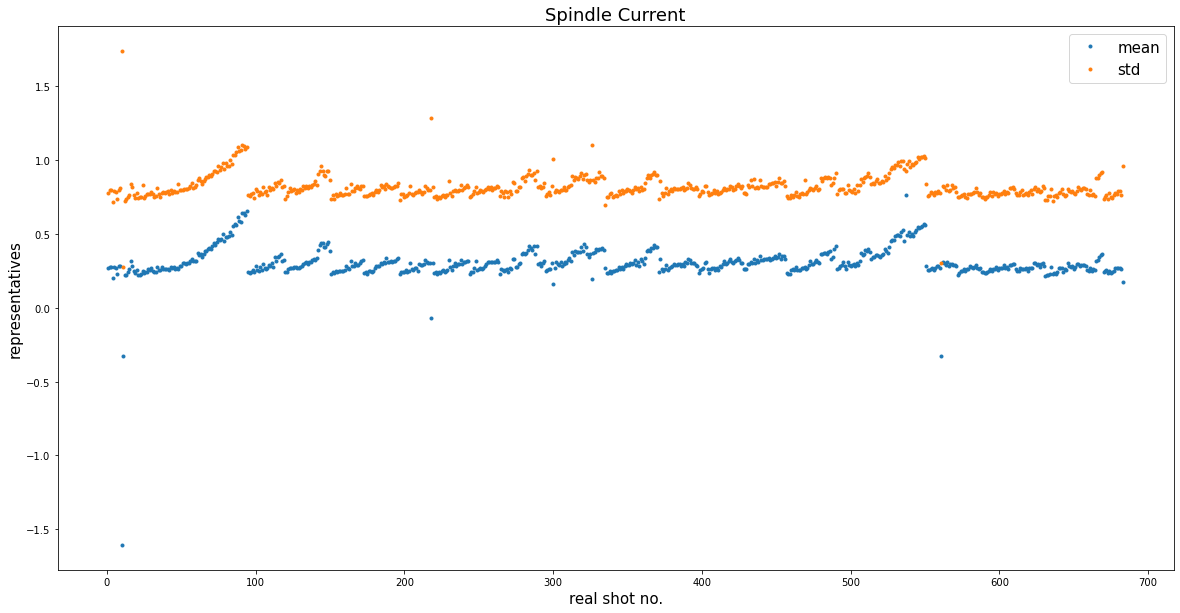

In [55]:
#전체 대표값 데이터 중 mean값을 scatter plot으로 가시화
show_plot(df_representative, ['mean', 'std'], title = 'Spindle Current', x_axis_title='real shot no.', y_axis_title='representatives')

mean,std


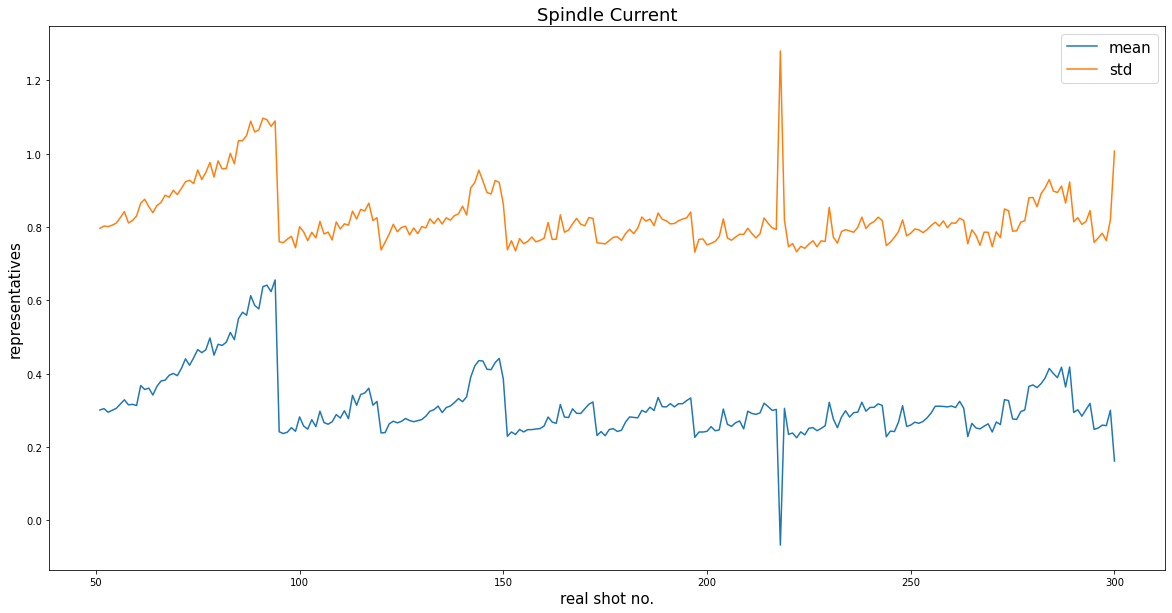

In [56]:
#전체 대표값 데이터 중 처음~300번째까지의 mean값을 scatter plot으로 가시화
show_plot(df_representative, ['mean', 'std'], title = 'Spindle Current', index_min=50, index_max= 300,
          x_axis_title='real shot no.', y_axis_title='representatives', linestyle='solid', marker=None)
#show_plot(df_representative, ['mean', 'std'], title = 'Spindle Current', index_min=50, index_max= 300,
#          x_axis_title='real shot no.', y_axis_title='representatives', linestyle='solid')

mean


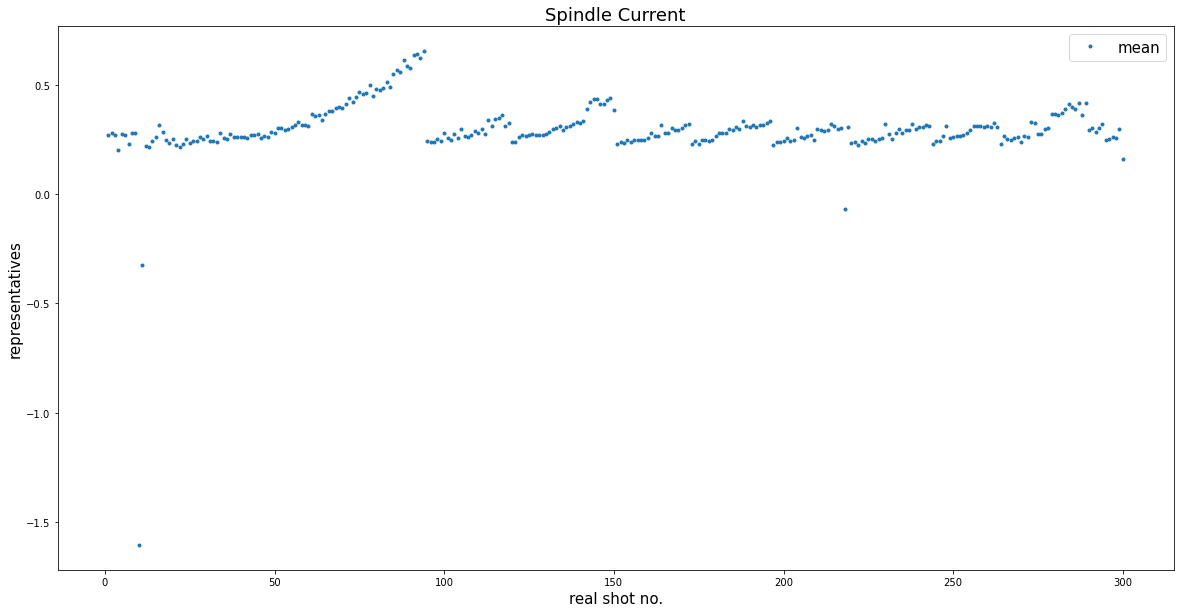

In [57]:
#전체 대표값 데이터 중 처음~300번째까지의 mean값을 scatter plot으로 가시화
show_plot(df_representative, ['mean'], title = 'Spindle Current', index_max= 300, x_axis_title='real shot no.', y_axis_title='representatives')